<div style="font-size:12pt;color:#999999">plots for:</div>
<div style="font-size:14pt;color:#000000">Denman DJ, Siegle JH, Koch C, Reid CR, Blanche TJ</div>
<div style="font-size:14pt;color:#000000"><strong>Spatial organization of chromatic pathways in the mouse dorsal lateral geniculate nucleus</strong></div>
<div style="font-size:14pt;color:#000000">Journal of Neuroscience, 2016</div>
<br></br>
<div style="font-size:12pt;color:#000000">all neural data is available in <a href="http://nwb.org/resources/#Format">Neurodata Without Borders format</a> from <a href="http://www.brain-map.org">brain-map.org</a></div>
<div style="font-size:12pt;color:#000000">custom functions and imported packages available on <a href="https://github.com/danieljdenman/mouse_chromatic">GitHub</a></div>

<div style="font-size:10pt;color:#999999">...imports and magics for plotting in this Jupyter notebook:</div>

In [3]:
from color_functions import * # functions writted by Daniel J. Denman for analysis and plotting of the data collected for this manuscript
                                  # this import includes associated packages like numpy, csv, h5py, etc... for a full list, 
                                  # see color_functions.py from the above GitHub page
%matplotlib inline

<div style="font-size:10pt;color:#999999">... load the neural data from NWB files</div>

In [4]:
#replace this path with a local path to the downloaded data folder.
#   this folder will contain folders called 'dome','images','nwbs2',and 'pkls'
path_to_data = '/Users/Administrator/Dropbox/allenTransfer/denman_colorLGN/color_data' #<-- Replace this 

        
data={}
for nwb_path in glob.glob(path_to_data+'/nwbs2/*.nwb'):#get all NWB files in the folder
    data[os.path.basename(nwb_path).split('_')[0]]=h5py.File(nwb_path)
    
    #do some light conditioning because of mismatches in naming conventions between experiments...
    nwbdata=data[os.path.basename(nwb_path).split('_')[0]]
    if 'flash_green' not in nwbdata['stimulus']['presentation'].keys():
        if 'vis_flash' in nwbdata['stimulus']['presentation'].keys():
            #nwb_file = nwbtools.ExtracellularEphysFile(modify=True)
            nwbdata['stimulus']['presentation']['flash_green']=nwbdata['stimulus']['presentation']['vis_flash']
        if 'flashes_vis' in nwbdata['stimulus']['presentation'].keys():
            nwbdata['stimulus']['presentation']['flash_green']=nwbdata['stimulus']['presentation']['flashes_vis']
    
    if 'flash_uv' not in nwbdata['stimulus']['presentation'].keys():
        if 'uv_flash' in nwbdata['stimulus']['presentation'].keys():
            nwbdata['stimulus']['presentation']['flash_uv']=nwbdata['stimulus']['presentation']['uv_flash']
        if 'flashes_uv' in nwbdata['stimulus']['presentation'].keys():
            nwbdata['stimulus']['presentation']['flash_uv']=nwbdata['stimulus']['presentation']['flashes_uv']
            
    if 'binary_green' not in nwbdata['stimulus']['presentation'].keys():
        if 'green_binary' in nwbdata['stimulus']['presentation'].keys():
            nwbdata['stimulus']['presentation']['binary_green']=nwbdata['stimulus']['presentation']['green_binary']
            nwbdata['stimulus']['presentation']['binary_uv']=nwbdata['stimulus']['presentation']['uv_binary']

<div style="font-size:10pt;color:#999999">...create a pandas dataframe, with a row for each cell</div>
<div style="font-size:10pt;color:#999999">   this dataframe will be populated at each figure with metrics calculated for each cell.</div>

In [5]:
#create a pandas dataframe, with a row for each cell
#this dataframe will be populated at each figure with metrics calculated for each cell.
dataframedict_expt = []
dataframedict_cell = []
for expt in data.keys():
    expt_expt=[];expt_cell=[]
    for cell in cell_numbers[expt]['lgn_list_ex']:
        expt_expt.extend([expt])
        expt_cell.extend([cell])
    dataframedict_expt.extend(expt_expt)
    dataframedict_cell.extend(expt_cell)
    
dataframedict={'Experiment':dataframedict_expt,'Cell':dataframedict_cell}
df = pd.DataFrame(dataframedict)

<br></br>
<br></br>
   <div style="font-size:16pt;color:#000000"><strong><font size='20' color='red'>Figure 1</font></strong></div>
   <br></br>
   <div style="font-size:10pt;color:#999999"> load the dome stimulation system measurements</div>

In [6]:
import djd.jeti as jeti
projector1_data = jeti.jetitodict(os.path.join(path_to_data,'dome','uvdome_withluminanceadjustements.csv')) #measured with SpectroCal
projector2_data_g = jeti.jetitodict(os.path.join(path_to_data,'dome','luminance_uvProjector2','green_set2.csv'))
projector2_data_u = jeti.jetitodict(os.path.join(path_to_data,'dome','luminance_uvProjector2','uv_set1.csv'))

<div style="font-size:12pt;color:#000000">Stimulus Environment Drawing, by J.S.</div>
<div style="font-size:10pt;color:#000000">Figure 1A</div>

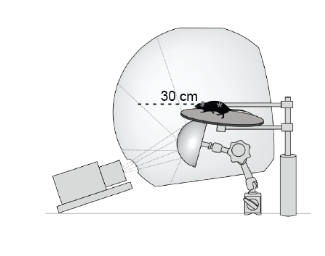

In [7]:
plt.imshow(imread(os.path.join(path_to_data,'images','Fig1A.png')))
dump = plt.gca().axis('off')

<div style="font-size:12pt;color:#000000">generate plots of LED irradiance and mouse sensitivity</div>
<div style="font-size:10pt;color:#000000">Figure 1B</div>

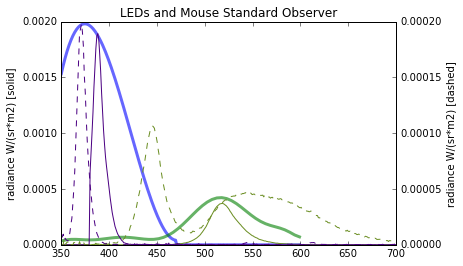

In [8]:
wv = np.linspace(350,700,350)
mso = np.zeros(350);mso[:249]=jeti.mso
green1_max = np.zeros(350);green1_max=projector1_data['structuredlight_G_100'][:350]
green2_max = np.zeros(350);green2_max[30:]=projector2_data_g['green_100'][:320]
uv1_max = np.zeros(350);uv1_max=projector1_data['structuredlight_UV_100'][:350]
uv2_max = np.zeros(350);uv2_max[30:]=projector2_data_u['uv_100'][:320]

f,ax = plt.subplots(1)
#ax.plot(np.linspace(350,700,350),mso/25000.,color='r')
scone = np.zeros(431)
mcone = np.zeros(431)
mcone2 = np.zeros(431)
scone[:120]=jeti.mso[:120]
scone = scone[:249]
mcone[:120]=[0.32 - 0.07 * i/120. for i in range(120)]
mcone[119:119+128]=jeti.mso[121:]
mcone = mcone[:249]
mcone2[:120]=[0.1+0.08 * i/120. for i in range(120)]
mcone2[119:119+128]=jeti.mso[121:]
mcone2 = mcone2[:249]
fit = np.polyfit(np.linspace(350,600,249),mcone,10)
p = np.poly1d(fit)
fit2 = np.polyfit(np.linspace(350,600,249),mcone2,10)
p2 = np.poly1d(fit2)
ax.plot(np.linspace(350,350+249,249),scone[:249]/2420.,linewidth=3,alpha=0.6)
ax.plot(np.linspace(350,350+len(mcone)),p2(np.linspace(350,350+len(mcone)))/2420.,linewidth=3,alpha=0.6)
axR=ax.twinx()
axR.plot(np.linspace(350,700,350),green1_max,color='#6B8E23',ls='--')
ax.plot(np.linspace(350,700,350),green2_max,color='#6B8E23')
axR.plot(np.linspace(350,700,350),uv1_max,color='#4B0082',ls='--')
ax.plot(np.linspace(350,700,350),uv2_max,color='#4B0082')
plt.xlabel('wavelength (nm)')
ax.set_ylabel('radiance W/(sr*m2) [solid]')
axR.set_ylabel('radiance W/(sr*m2) [dashed]')
dump=plt.title('LEDs and Mouse Standard Observer')
plt.gcf().savefig(os.path.join(path_to_data,'fig1B.eps'),format='eps')

<div style="font-size:12pt;color:#000000">Flux calculations, as follows: </div>
<div style="font-size:10pt;color:#000000">flux = E • λ/ch • 8.4801e-8 , where</div>
<div style="font-size:10pt;color:#000000">E = radiance in m/(sr*m2)</div>
<div style="font-size:10pt;color:#000000">λ = wavelength</div>
<div style="font-size:10pt;color:#000000">c = speed of light in a vacuum</div>
<div style="font-size:10pt;color:#000000">h = Planck's constant</div>
<div style="font-size:10pt;color:#000000">8.4801e-8 converts m2 to deg2 </div>

In [9]:
c = 299792458 # m/s,  speed of light in a vacuum
h = 6.62607004e-34 #J/ s Planck's constant
wavelengths = np.linspace(350,700,350)
green_flux = [green1_max[i]* 8.4801e-8 * (wavelengths[i]*1e-9) / (c * h) for i in range(350)]
uv_flux = [uv1_max[i]* 8.4801e-8 * (wavelengths[i]*1e-9) / (c * h) for i in range(350)]
print 'green projector #1 : '+"{:.2E}".format(Decimal(str(np.sum(green_flux)/2)))+' quanta/sec'
print 'UV projector #1 : '+"{:.2E}".format(Decimal(str(np.sum(uv_flux)/2)))+' quanta/sec'
print ' '
green_flux = [green2_max[i]* 8.4801e-8 * (wavelengths[i]*1e-9) / (c * h) for i in range(350)]
uv_flux = [uv2_max[i]* 8.4801e-8 * (wavelengths[i]*1e-9) / (c * h) for i in range(350)]
print 'green projector #2 : '+"{:.2E}".format(Decimal(str(np.sum(green_flux)/2)))+' quanta/sec'
print 'UV projector #2 : '+"{:.2E}".format(Decimal(str(np.sum(uv_flux)/2)))+' quanta/sec'

green projector #1 : 9.79E+8 quanta/sec
UV projector #1 : 2.22E+8 quanta/sec
 
green projector #2 : 1.65E+9 quanta/sec
UV projector #2 : 2.31E+9 quanta/sec


<div style="font-size:12pt;color:#000000"> show plot of warp accuracy</div>
<div style="font-size:10pt;color:#000000">Figure 1C</div>

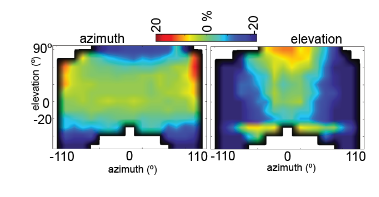

In [10]:
plt.imshow(imread(os.path.join(path_to_data,'images','Fig1C.png')))
dump = plt.gca().axis('off')

<div style="font-size:12pt;color:#000000">generate plot of contrast linearity</div>
<div style="font-size:10pt;color:#000000">Figure 1D</div>


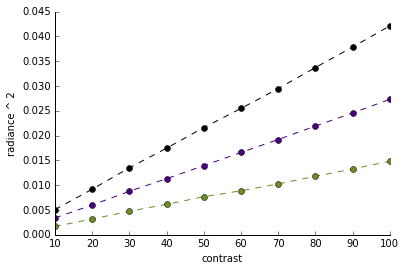

In [11]:
wavelengths = projector2_data_u['wavelengths']
contrasts = np.linspace(10,100,10)
total_irradiance_uv = []
total_irradiance_green = []
total_irradiance = []
for contrast in contrasts:
    both = projector2_data_u['uv_'+str(int(contrast))]+projector2_data_g['green_'+str(int(contrast))]
    total_irradiance.append(np.trapz(both[:300]))
    total_irradiance_uv.append(np.trapz(projector2_data_u['uv_'+str(int(contrast))][:300]))
    total_irradiance_green.append(np.trapz(projector2_data_g['green_'+str(int(contrast))][:300]))
plt.plot(contrasts,total_irradiance,'--o',color='k')
plt.plot(contrasts,total_irradiance_uv,'--o',color='#4B0082')
plt.plot(contrasts,total_irradiance_green,'--o',color='#6B8E23')
plt.xlabel('contrast')
plt.ylabel('radiance ^ 2')
cleanAxes(plt.gca(),leftLabels=True,bottomLabels=True)

<br></br>
<br></br>
<div style="font-size:16pt;color:#000000"><strong><font size='20' color='red'>Figure 2</font></strong></div>

<div style="font-size:12pt;color:#999999">starting from the spike times, generate PSTHs from flashed stimuli and make some measurements on them </div>

In [12]:
flash_green_ON_peak=[]; flash_green_ON_area=[];flash_green_ON_latency=[];flash_green_OFF_peak=[];flash_green_OFF_area=[];flash_green_OFF_latency=[]
flash_UV_ON_peak=[];flash_UV_ON_area=[];flash_UV_ON_latency=[];flash_UV_OFF_peak=[];flash_UV_OFF_area=[];flash_UV_OFF_latency=[];flash_luminance_class=[];
flash_bgi_dark=[];flash_bgi_bright=[];flash_bgi_best=[];flash_bgi2_dark=[];flash_bgi2_bright=[];flash_bgi2_best=[]
latency_label = np.ones(np.shape(df)[0])-2
on_latency = [];off_latency = []
flash_green_ON = [];flash_green_OFF = [];flash_UV_ON = [];flash_UV_OFF = [];
flash_baseline = [];flash_baseline_sigma=[]

pre=0.25
post=1.5
binsize=0.01

for i in range(np.shape(df)[0]):
    try:
        nwb_data = data[df['Experiment'][i]]
        cell = str(str(df['Cell'][i]))
        
        #---------------------------------------------------------------------------------------------------------------------------------------
        #calculate the PSTH for each cell, for each color, for increments and decrements 
        psth = psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                         np.array(nwb_data['stimulus']['presentation']['flash_green']['timestamps'])[1::2],
                         binsize=binsize,pre=pre,post=post,timeDomain=True,output='hist')
        flash_green_ON_area.extend([psth_area(psth,pre=pre,binsize=binsize)])
        flash_green_ON_peak.extend([np.max(psth[0])])
        flash_green_ON_latency.extend([psth_latency(psth[0][5:60],psth[1][5:60],smooth=True,offset=8.33)])
        flash_green_ON.extend([psth])
        baseline1 = psth[0][:5]

        psth = psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                         np.array(nwb_data['stimulus']['presentation']['flash_green']['timestamps'])[2::2],
                         binsize=binsize,pre=pre,post=post,timeDomain=True,output='hist')
        flash_green_OFF_area.extend([psth_area(psth,pre=pre,binsize=binsize)])
        flash_green_OFF_peak.extend([np.max(psth[0])])
        flash_green_OFF_latency.extend([psth_latency(psth[0][5:60],psth[1][5:60],smooth=True,offset=16.66)])
        flash_green_OFF.extend([psth])
        baseline2 = psth[0][:5]

        psth = psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                         np.array(nwb_data['stimulus']['presentation']['flash_uv']['timestamps'])[1::2],
                         binsize=binsize,pre=pre,post=post,timeDomain=True,output='hist')
        flash_UV_ON_area.extend([psth_area(psth,pre=pre,binsize=binsize)])
        flash_UV_ON_peak.extend([np.max(psth[0])])
        flash_UV_ON_latency.extend([psth_latency(psth[0][5:60],psth[1][5:60],smooth=True,offset=8.33)])
        flash_UV_ON.extend([psth])
        baseline3 = psth[0][:5]

        psth = psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                         np.array(nwb_data['stimulus']['presentation']['flash_uv']['timestamps'])[2::2],
                         binsize=binsize,pre=pre,post=post,timeDomain=True,output='hist')
        flash_UV_OFF_area.extend([psth_area(psth,pre=pre,binsize=binsize)])
        flash_UV_OFF_peak.extend([np.max(psth[0])])
        flash_UV_OFF_latency.extend([psth_latency(psth[0][5:60],psth[1][5:60],smooth=True,offset=16.66)])
        flash_UV_OFF.extend([psth])
        baseline4 = psth[0][:5]
        
        flash_baseline.extend([(np.mean(baseline1)+np.mean(baseline2)+np.mean(baseline3)+np.mean(baseline4))/4.])
        flash_baseline_sigma.extend([(np.std(baseline1)+np.std(baseline2)+np.std(baseline3)+np.std(baseline4))/4.])
        #---------------------------------------------------------------------------------------------------------------------------------------
    except: #if there was some problem, populate with np.nan
        #print str('FAEL PSTH: ') + df['Experiment'][i] + ' '+str(str(df['Cell'][i]))
        for d in [flash_green_ON_peak,flash_green_ON_area,flash_green_ON_latency,flash_green_OFF_peak,flash_green_OFF_area,flash_green_OFF_latency,flash_UV_ON_peak,
                  flash_UV_ON_area,flash_UV_ON_latency,flash_UV_OFF_peak,flash_UV_OFF_area,flash_UV_OFF_latency,
                 flash_green_ON,flash_green_OFF,flash_UV_ON,flash_UV_OFF,flash_baseline,flash_baseline_sigma]:
            d.extend([np.nan])
df['flash_green_ON_peak']=flash_green_ON_peak
df['flash_green_ON_area']=flash_green_ON_area
df['flash_green_ON_latency']=flash_green_ON_latency
df['flash_green_OFF_peak']=flash_green_OFF_peak
df['flash_green_OFF_area']=flash_green_OFF_area
df['flash_green_OFF_latency']=flash_green_OFF_latency
df['flash_UV_ON_peak']=flash_UV_ON_peak
df['flash_UV_ON_area']=flash_UV_ON_area
df['flash_UV_ON_latency']=flash_UV_ON_latency
df['flash_UV_OFF_peak']=flash_UV_OFF_peak
df['flash_UV_OFF_area']=flash_UV_OFF_area
df['flash_UV_OFF_latency']=flash_UV_OFF_latency
df['flash_green_OFF']=flash_green_OFF
df['flash_green_ON']=flash_green_ON
df['flash_UV_OFF']=flash_UV_OFF
df['flash_UV_ON']=flash_UV_ON
df['flash_baseline']=flash_baseline
df['flash_baseline_sigma']=flash_baseline_sigma

for i in range(np.shape(df)[0]):
    try:
        nwb_data = data[df['Experiment'][i]]
        cell = str(str(df['Cell'][i]))        
        #---------------------------------------------------------------------------------------------------------------------------------------
        #find the best stimulus for this cell 
        maxi = 0
        for stim in ['UV_OFF','UV_ON','green_OFF','green_ON']:
            if df['flash_'+stim+'_peak'][i] > maxi:
                maxi = df['flash_'+stim+'_peak'][i]
                max_type = stim
        
        #using the color of the best stimulus, compare ON and OFF and put this cell in the appropriate class
        #uses a difference of 25msec [half of the duration] in latency to do the classification.
        if  df['flash_'+max_type.split('_')[0]+'_ON_latency'][i] - df['flash_'+max_type.split('_')[0]+'_OFF_latency'][i] > 25.:
            latency_label[i]=2
            flash_luminance_class.extend(['ON'])
        else:
            if  df['flash_'+max_type.split('_')[0]+'_ON_latency'][i] - df['flash_'+max_type.split('_')[0]+'_OFF_latency'][i] < -25.:
                latency_label[i]=0
                flash_luminance_class.extend(['OFF'])
            else:
                if np.abs( df['flash_'+max_type.split('_')[0]+'_ON_latency'][i] - df['flash_'+max_type.split('_')[0]+'_OFF_latency'][i]) < 25.:
                    latency_label[i]=1
                flash_luminance_class.extend(['ON/OFF'])
        
        #using the color of the best stimulus, find the ON and OFF latencies
        on_latency.extend([df['flash_'+max_type.split('_')[0]+'_ON_latency'][i]])
        off_latency.extend([df['flash_'+max_type.split('_')[0]+'_OFF_latency'][i]]) 
        #---------------------------------------------------------------------------------------------------------------------------------------
        
        #---------------------------------------------------------------------------------------------------------------------------------------
        #calculate the UVGi for this cell
        flash_bgi_dark.extend([(df['flash_green_OFF_peak'][i]-df['flash_UV_OFF_peak'][i])/float(df['flash_green_OFF_peak'][i]+df['flash_UV_OFF_peak'][i])])
        flash_bgi_bright.extend([(df['flash_green_ON_peak'][i]-df['flash_UV_ON_peak'][i])/float(df['flash_green_ON_peak'][i]+df['flash_UV_ON_peak'][i])])
        flash_bgi2_dark.extend([(df['flash_green_OFF_area'][i]-df['flash_UV_OFF_area'][i])/float(df['flash_green_OFF_area'][i]+df['flash_UV_OFF_area'][i])])
        flash_bgi2_bright.extend([(df['flash_green_ON_area'][i]-df['flash_UV_ON_area'][i])/float(df['flash_green_ON_area'][i]+df['flash_UV_ON_area'][i])])    
            
        if latency_label[i] == 0:#OFF
            if df['flash_green_OFF_peak'][i] > (np.mean(df['flash_green_OFF'][i][0][0:5])+np.std(df['flash_green_OFF'][i][0][0:5])*3) and df['flash_UV_OFF_peak'][i] > (np.mean(df['flash_UV_OFF'][i][0][0:5])+np.std(df['flash_UV_OFF'][i][0][0:5])*3):
                flash_bgi2_best.extend([(df['flash_green_OFF_area'][i]-df['flash_UV_OFF_area'][i])/float(df['flash_green_OFF_area'][i]+df['flash_UV_OFF_area'][i])])
                flash_bgi_best.extend([(df['flash_green_OFF_peak'][i]-df['flash_UV_OFF_peak'][i])/float(df['flash_green_OFF_peak'][i]+df['flash_UV_OFF_peak'][i])])
            else:
                if df['flash_green_OFF_peak'][i] > (np.mean(df['flash_green_OFF'][i][0][0:5])+np.std(df['flash_green_OFF'][i][0][0:5])*3):
                    flash_bgi2_best.extend([1.])
                    flash_bgi_best.extend([1.])
                else :
                    flash_bgi2_best.extend([-1.])
                    flash_bgi_best.extend([-1.])
        else:
            if latency_label[i] == 2:#ON
                if df['flash_green_ON_peak'][i] > (np.mean(df['flash_green_ON'][i][0][0:5])+np.std(df['flash_green_ON'][i][0][0:5])*3) and df['flash_UV_ON_peak'][i] > (np.mean(df['flash_UV_ON'][i][0][0:5])+np.std(df['flash_UV_ON'][i][0][0:5])*3):
                    flash_bgi2_best.extend([(df['flash_green_ON_area'][i]-df['flash_UV_ON_area'][i])/float(df['flash_green_ON_area'][i]+df['flash_UV_ON_area'][i])])
                    flash_bgi_best.extend([(df['flash_green_ON_peak'][i]-df['flash_UV_ON_peak'][i])/float(df['flash_green_ON_peak'][i]+df['flash_UV_ON_peak'][i])])
                else:
                    if df['flash_green_ON_peak'][i] > (np.mean(df['flash_green_ON'][i][0][0:5])+np.std(df['flash_green_ON'][i][0][0:5])*3):
                        flash_bgi2_best.extend([1.])
                        flash_bgi_best.extend([1.])
                    else :
                        flash_bgi2_best.extend([-1.])      
                        flash_bgi_best.extend([-1.])   

            else:# latency_label[i] == 1:#ON/OFF
                flash_bgi2_best.extend([(df['flash_green_ON_area'][i]-df['flash_UV_ON_area'][i])/float(df['flash_green_ON_area'][i]+df['flash_UV_ON_area'][i])])
                flash_bgi_best.extend([(df['flash_green_ON_peak'][i]-df['flash_UV_ON_peak'][i])/float(df['flash_green_ON_peak'][i]+df['flash_UV_ON_peak'][i])])

                
                #---------------------------------------------------------------------------------------------------------------------------------------
        
    except: #if there was some problem, populate with np.nan
        print str('FAEL bgi: ') + df['Experiment'][i] + ' '+str(str(df['Cell'][i]))
        for d in [on_latency,off_latency,flash_luminance_class,
                  flash_bgi_dark,flash_bgi_bright,flash_bgi_best,flash_bgi2_dark,flash_bgi2_bright,flash_bgi2_best]:
            d.extend([np.nan])


df['ON_latency'] = on_latency#np.nan_to_num(np.array(on_latency))
df['OFF_latency'] =off_latency#np.nan_to_num(np.array(off_latency))
df['latency_label'] = latency_label
df['flash_luminance_class']=flash_luminance_class
df['flash_bgi_bright']=flash_bgi_bright
df['flash_bgi_dark']=flash_bgi_dark
df['flash_bgi_best']=flash_bgi_best
df['flash_bgi2_dark']=flash_bgi2_dark
df['flash_bgi2_bright']=flash_bgi2_bright
df['flash_bgi2_best']=flash_bgi2_best

color_functions.py:208: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  bytrial = np.zeros((len(triggers),numbins))
color_functions.py:216: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  bytrial[i][(trial_spike-t)/binsize-1] +=1
color_functions.py:290: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  area = np.trapz(np.abs(data[startbin:startbin+np.ceil(time/binsize)]) - baseline)


<div style="font-size:12pt;color:#000000">plot example flash responses</div>
<div style="font-size:10pt;color:#000000">Figure 2A</div>

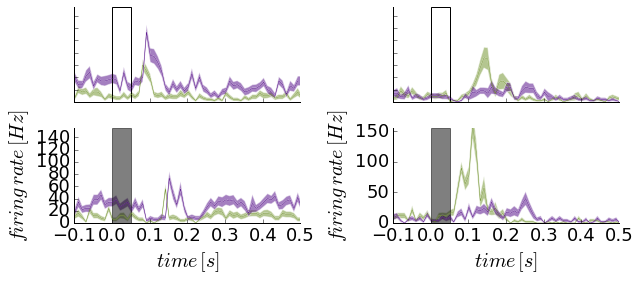

In [13]:
f,ax = plt.subplots(2,2,figsize=(9,4))
ymax = 155


#cell i
nwb_data = data['M179401']
cell = str(cell_numbers['M179401']['lgn_list_ex'][-1])
f=psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
            np.array(nwb_data['stimulus']['presentation']['flash_green']['timestamps'])[1::2],
            binsize=binsize,pre=pre,post=post,timeDomain=True,output='fig',
            axes=ax[0][0],color=Green,sparse=True,ymax=ymax)
f=psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
            np.array(nwb_data['stimulus']['presentation']['flash_green']['timestamps'])[2::2],
            binsize=binsize,pre=pre,post=post,timeDomain=True,output='fig',
            axes=ax[1][0],color=Green,ymax=ymax)
f=psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
            np.array(nwb_data['stimulus']['presentation']['flash_uv']['timestamps'])[1::2]+0.016,
            binsize=binsize,pre=pre,post=post,timeDomain=True,output='fig',
            axes=ax[0][0],color=UV,sparse=True,ymax=ymax)
f=psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
            np.array(nwb_data['stimulus']['presentation']['flash_uv']['timestamps'])[2::2]+0.016,
            binsize=binsize,pre=pre,post=post,timeDomain=True,output='fig',
            axes=ax[1][0],color=UV,ymax=ymax)


#cell ii
nwb_data = data['M181423']
cell = str(101)#str(cell_numbers['M181423']['lgn_list_ex'][-10])
f=psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
            np.array(nwb_data['stimulus']['presentation']['flash_green']['timestamps'])[1::2],
            binsize=binsize,pre=pre,post=post,timeDomain=True,output='fig',
            axes=ax[0][1],color=Green,sparse=True,ymax=ymax)
f=psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
            np.array(nwb_data['stimulus']['presentation']['flash_green']['timestamps'])[2::2],
            binsize=binsize,pre=pre,post=post,timeDomain=True,output='fig',
            axes=ax[1][1],color=Green,ymax=ymax)
f=psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
            np.array(nwb_data['stimulus']['presentation']['flash_uv']['timestamps'])[1::2]+0.016,
            binsize=binsize,pre=pre,post=post,timeDomain=True,output='fig',
            axes=ax[0][1],color=UV,sparse=True,ymax=ymax)
f=psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
            np.array(nwb_data['stimulus']['presentation']['flash_uv']['timestamps'])[2::2]+0.016,
            binsize=binsize,pre=pre,post=post,timeDomain=True,output='fig',
            axes=ax[1][1],color=UV,ymax=ymax)

ax[0][0].add_patch(patches.Rectangle((0,0),0.05,ymax,edgecolor='k',fill=None));
ax[1][0].add_patch(patches.Rectangle((0,0),0.05,ymax,color='k',alpha=0.5));
ax[0][1].add_patch(patches.Rectangle((0,0),0.05,ymax,edgecolor='k',fill=None));
ax[1][1].add_patch(patches.Rectangle((0,0),0.05,ymax,color='k',alpha=0.5));
for axis in ax.flatten():
    axis.set_xlim(-0.1,0.5)
plt.tight_layout()
plt.gcf().savefig(os.path.join(path_to_data,'fig2A.eps'),format='eps')

<div style="font-size:12pt;color:#000000"> scatterplot of ON and OFF latencies</div>
<div style="font-size:10pt;color:#000000">Figure 2B</div>

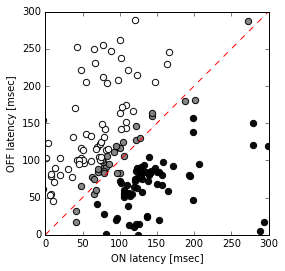

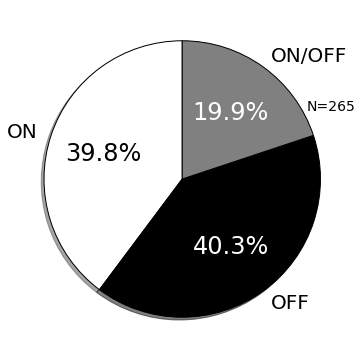

In [14]:
plt.figure()
df['latency_label']=latency_label
plt.scatter(df['OFF_latency'][np.where(latency_label==0)[0]],df['ON_latency'][np.where(latency_label==0)[0]],edgecolor='k',facecolor='#000000',s=40,alpha=0.95)
plt.scatter(df['OFF_latency'][np.where(latency_label==1)[0]],df['ON_latency'][np.where(latency_label==1)[0]],edgecolor='k',facecolor='#808080',s=40,alpha=0.95)
plt.scatter(df['OFF_latency'][np.where(latency_label==2)[0]],df['ON_latency'][np.where(latency_label==2)[0]],edgecolor='k',facecolor='#FFFFFF',s=40,alpha=0.95)
plt.xlim(0,300);plt.ylim(0,300)
plt.xlabel('ON latency [msec]')
plt.ylabel('OFF latency [msec]')
plt.gca().set_aspect('equal')
plt.plot([0,300],[0,300],'r--')
plt.gcf().savefig(os.path.join(path_to_data,'fig2B.eps'),format='eps')


plt.figure(figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
labels = 'ON', 'OFF', 'ON/OFF'
fracs = [np.shape(np.where(latency_label==2)[0])[0], np.shape(np.where(latency_label==0)[0])[0], np.shape(np.where(latency_label==1)[0])[0]]
colors = ['white', 'black', 'grey']
patches_l, texts, autotexts = plt.pie(fracs, labels=labels,colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90)
plt.gca().text(0.9,0.5,'N='+str(len(latency_label)),size=14)
for text in texts:
    text.set_fontsize(20)
for text in autotexts:
    text.set_fontsize(24)
autotexts[2].set_color('white')
autotexts[1].set_color('white')
plt.gcf().savefig(os.path.join(path_to_data,'fig2C.eps'),format='eps')

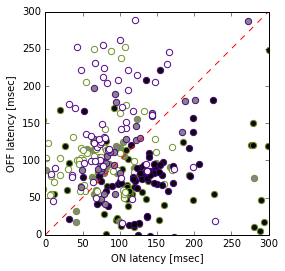

In [15]:
plt.figure()
df['latency_label']=latency_label
plt.scatter(df['flash_green_OFF_latency'][np.where(latency_label==0)[0]],df['flash_green_ON_latency'][np.where(latency_label==0)[0]],
            edgecolor=Green,facecolor='#000000',s=40,alpha=0.95)
plt.scatter(df['flash_green_OFF_latency'][np.where(latency_label==1)[0]],df['flash_green_ON_latency'][np.where(latency_label==1)[0]],
            edgecolor=Green,facecolor='#808080',s=40,alpha=0.95)
plt.scatter(df['flash_green_OFF_latency'][np.where(latency_label==2)[0]],df['flash_green_ON_latency'][np.where(latency_label==2)[0]],
            edgecolor=Green,facecolor='#FFFFFF',s=40,alpha=0.95)
plt.scatter(df['flash_UV_OFF_latency'][np.where(latency_label==0)[0]],df['flash_UV_ON_latency'][np.where(latency_label==0)[0]],
            edgecolor=UV,facecolor='#000000',s=40,alpha=0.95)
plt.scatter(df['flash_UV_OFF_latency'][np.where(latency_label==1)[0]],df['flash_UV_ON_latency'][np.where(latency_label==1)[0]],
            edgecolor=UV,facecolor='#808080',s=40,alpha=0.95)
plt.scatter(df['flash_UV_OFF_latency'][np.where(latency_label==2)[0]],df['flash_UV_ON_latency'][np.where(latency_label==2)[0]],
            edgecolor=UV,facecolor='#FFFFFF',s=40,alpha=0.95)
plt.xlim(0,300);plt.ylim(0,300)
plt.xlabel('ON latency [msec]')
plt.ylabel('OFF latency [msec]')
plt.gca().set_aspect('equal')
plt.plot([0,300],[0,300],'r--')


<div style="font-size:12pt;color:#000000">histograms of UVGi and pie charts for each luminance class </div>
<div style="font-size:10pt;color:#000000">figure(s) 2D,E,F</div>

/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


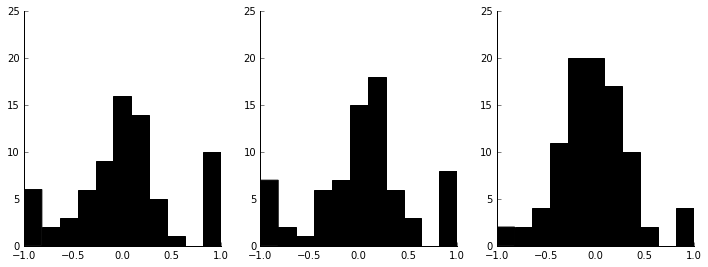

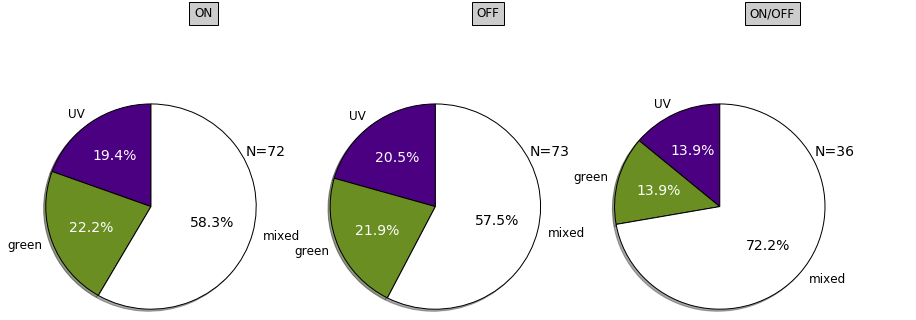

In [16]:
f,ax = plt.subplots(1,3,figsize=(12,4.2))
ax[0].hist(np.array(df['flash_bgi_best'][df['flash_luminance_class']=='ON']),range=(-1,1),bins=11,color='k')
ax[1].hist(np.array(df['flash_bgi_best'][df['flash_luminance_class']=='OFF']),range=(-1,1),bins=11,color='k')
ax[2].hist(np.array(df['flash_bgi_best'][df['flash_luminance_class']=='ON/OFF']),range=(-1,1),bins=11,color='k')
for axis in ax:
    axis.set_ylim(0,25)
    cleanAxes(axis,bottomLabels=True,leftLabels=True)
plt.gcf().savefig(os.path.join(path_to_data,'fig2D_t.eps'),format='eps')

f,axes = plt.subplots(1,3,figsize=(12,4.2))
#ax = plt.axes([0.1, 0.1, 0.8, 0.8])
labels = 'UV', 'green', 'mixed'
df2 = df[df.latency_label==2]
fracs = [len(df2[df2['flash_bgi_best'] < -0.3])/float(len(df2)),
         len(df2[df2['flash_bgi_best'] > 0.3])/float(len(df2)),
         len(df2[df2['flash_bgi_best'] > -0.3][df2['flash_bgi_best'] < 0.3])/float(len(df2))]
colors = [UV, Green, '#FFFFFF']
ptches, texts, autotexts = axes[0].pie(fracs, labels=labels,colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].text(0.9,0.5,'N='+str(len(df2)),size=14)
for text in texts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_fontsize(14)
autotexts[0].set_color('white')
autotexts[1].set_color('white')
axes[0].set_title('ON', bbox={'facecolor':'0.8', 'pad':5})

#plt.figure(figsize=(4,4))
#ax = plt.axes([0.1, 0.1, 0.8, 0.8])
labels = 'UV', 'green', 'mixed'
df2 = df[df.latency_label==0]
fracs = [len(df2[df2['flash_bgi_best'] < -0.3])/float(len(df2)),
         len(df2[df2['flash_bgi_best'] > 0.3])/float(len(df2)),
         len(df2[df2['flash_bgi_best'] > -0.3][df2['flash_bgi_best'] < 0.3])/float(len(df2))]
colors = [UV, Green, '#FFFFFF']
ptches, texts, autotexts = axes[1].pie(fracs, labels=labels,colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].text(0.9,0.5,'N='+str(len(df2)),size=14)
for text in texts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_fontsize(14)
autotexts[0].set_color('white')
autotexts[1].set_color('white')
axes[1].set_title('OFF', bbox={'facecolor':'0.8', 'pad':5})


#plt.figure(figsize=(4,4))
#ax = plt.axes([0.1, 0.1, 0.8, 0.8])
labels = 'UV', 'green', 'mixed'
df2 = df[df.latency_label==1]
fracs = [len(df2[df2['flash_bgi_best'] < -0.3])/float(len(df2)),
         len(df2[df2['flash_bgi_best'] > 0.3])/float(len(df2)),
         len(df2[df2['flash_bgi_best'] > -0.3][df2['flash_bgi_best'] < 0.3])/float(len(df2))]
colors = [UV, Green, '#FFFFFF']
ptches, texts, autotexts = axes[2].pie(fracs, labels=labels,colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90)
axes[2].text(0.9,0.5,'N='+str(len(df2)),size=14)
for text in texts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_fontsize(14)
autotexts[0].set_color('white')
autotexts[1].set_color('white')
axes[2].set_title('ON/OFF', bbox={'facecolor':'0.8', 'pad':5})

for axis in axes:
    axis.set_xlim((-0.8, 1.8))
    axis.set_ylim((-0.8, 1.8))
plt.tight_layout()
plt.gcf().savefig(os.path.join(path_to_data,'fig2D_b.eps'),format='eps')

<div style="font-size:12pt;color:#000000">inspecting the insensitivity of UVGi to non-responsive cells</div>
<div style="font-size:10pt;color:#000000">requested during review process</div>

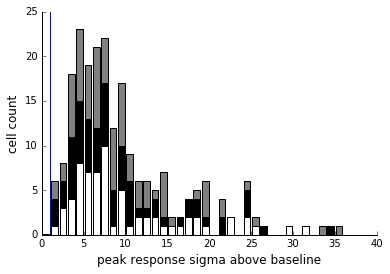

In [17]:
plt.hist([(df.flash_UV_ON_peak[df.flash_luminance_class == 'ON'] - df.flash_baseline)/df.flash_baseline_sigma,
          (df.flash_UV_OFF_peak[df.flash_luminance_class == 'OFF'] - df.flash_baseline)/df.flash_baseline_sigma,
          (df.flash_UV_ON_peak[df.flash_luminance_class == 'ON/OFF'] - df.flash_baseline)/df.flash_baseline_sigma],
         range=(0,40),bins=40,color=['w','k','grey'],stacked=True)
plt.gca().axvline(1.)
plt.xlabel('peak response sigma above baseline',size=12)
plt.ylabel('cell count',size=12)
cleanAxes(plt.gca(),leftLabels=True,bottomLabels=True)

<div style="font-size:12pt;color:#000000">Above, stacked histogram of sigma above baseline for the sign-appropriate response </div>
<div style="font-size:12pt;color:#000000">All cells had a peak response greater than 1 sigma above baseline</div>
<div style="font-size:10pt;color:#000000">white: ON cell, black: OFF cells, grey: ON/OFF cells </div>


<br></br>
<br></br>
<div style="font-size:16pt;color:#000000"><strong><font size='20' color='red'>Figure 3</font></strong></div>

<div style="font-size:12pt;color:#000000">example spatiotemporal receptive field</div>
<div style="font-size:10pt;color:#000000">figures 3A,B</div>

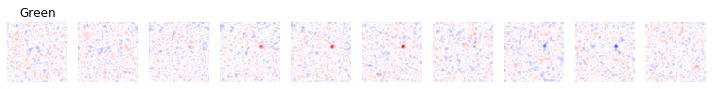

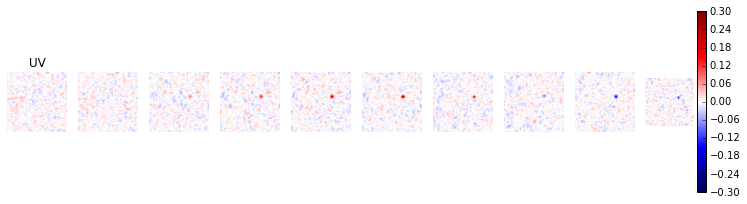

In [18]:
nwb_data=data['M192079']
cell = '87'

sta_green = sta(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                np.array(nwb_data['stimulus']['presentation']['binary_green']['data']).T,
                np.array(nwb_data['stimulus']['presentation']['binary_green']['timestamps'])+0.016,
                taus=(np.linspace(-10,280,30)),exclusion=None,samplingRateInkHz=.001)

sta_uv = sta(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                np.array(nwb_data['stimulus']['presentation']['binary_uv']['data']).T,
                np.array(nwb_data['stimulus']['presentation']['binary_uv']['timestamps'])+0.016,
                taus=(np.linspace(-10,280,30)),exclusion=None,samplingRateInkHz=.001)

plot_taus = [60,70,90,100,110,120,140,160,180,220]
plotsta(sta_green,plot_taus,nrows=1,colorrange=(-0.3,0.3),smooth=1,title='Green')
plt.gcf().savefig(os.path.join(path_to_data,'3A_g.eps'),format='eps')
plotsta(sta_uv,plot_taus,nrows=1,colorrange=(-0.3,0.3),smooth=1,title='UV',colorbar=True)
plt.gcf().savefig(os.path.join(path_to_data,'3A_u.eps'),format='eps')

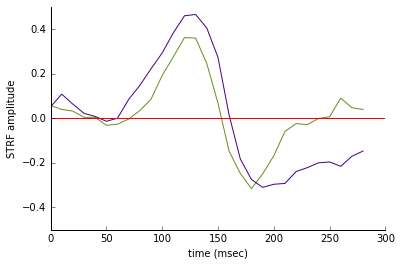

In [19]:
f,ax = plt.subplots(1,1)
taus,imp = impulse(sta_green,center=(43,26),taus=(np.linspace(-10,280,30).astype(int)))
ax.plot(taus,imp,color=Green)
taus,imp = impulse(sta_uv,center=(43,26),taus=(np.linspace(-10,280,30).astype(int)))
ax.plot(taus,imp,color=UV)
ax.set_ylabel('STRF amplitude')
ax.set_xlabel('time (msec)')
ax.set_ylim(-0.5,0.5)
ax.set_xlim(0,300)
ax.axhline(0,color='r')
cleanAxes(ax,leftLabels=True,bottomLabels=True)
plt.gcf().savefig(os.path.join(path_to_data,'3A_imp.eps'),format='eps')

<br></br>
<div style="font-size:12pt;color:#000000"> load calculated spike-triggered average for each cell. </div> each has been fit with 2D Gaussian, using fit_rf_2Dgauss_centerFixed() in color_units.py </div> 
<div style="font-size:9pt;color:#000000"> computed separately for each experiment, and pre-loaded here to save time.</div> 

In [20]:
df_rf = pkl.load(open(os.path.join(path_to_data,'pkls','color_units.pkl'),'rb'))

<div style="font-size:12pt;color:#000000"> summary plot of receptive fields across space, pseudo-colored based on UVGi from flashes</div>
binned with means and standard errors along each axis</div> <div> Figure 3C</div> 

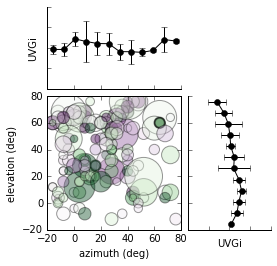

In [21]:
df2 = df_rf[(np.abs(df_rf['rf_best_s_x']*5.)+np.abs(df_rf['rf_best_s_y']*5.))/2. < 16.] # limit only to reasonable receptive fields
df2 = df2[(df2['rf_best_x']-28)*4. > -20]
df2 = df2[(df2['rf_best_x']-28)*4. < 80]
df2 = df2[(df2['rf_best_y']-28)*4. < 80]
bins = 12
rang = (-20,80)

fig = plt.figure(figsize=(4,4))
ax_scatter =  placeAxesOnGrid(fig,dim=(1,1),xspan=(0,0.6),yspan=(0.4,1.0))
scatter_withcirclesize(ax_scatter,(df2['rf_best_x']-28)*4.,(df2['rf_best_y']-28)*4.,s=(np.abs(df2['rf_best_s_x']*5.)+np.abs(df2['rf_best_s_y']*5.))/2.,c=np.array(df2['flash_bgi_best']).tolist(),alpha=0.4,cmap=plt.cm.PRGn)
ax_scatter.set_xlim(rang[0],rang[1]);plt.xlabel('azimuth (deg)')
ax_scatter.set_ylim(rang[0],rang[1]);plt.ylabel('elevation (deg)')
ax_scatter.set_aspect('equal')

ax_azimuth =  placeAxesOnGrid(fig,dim=(1,1),xspan=(0,0.6),yspan=(0.0,0.37))
x_a=(df2['rf_best_x'][~np.isnan(df2['flash_bgi_best'])]-28)*4.
y_a=df2['flash_bgi_best'][~np.isnan(df2['flash_bgi_best'])]
n_a,_a=np.histogram(x_a,bins=bins,range=rang)
sy_a,_a=np.histogram(x_a,bins=bins,range=rang,weights=y_a)
sy2_a,_a=np.histogram(x_a,bins=bins,range=rang,weights=y_a*y_a)
mean_a = sy_a/n_a
std_a = (sy2_a/n_a- mean_a*mean_a)
ax_azimuth.errorbar((_a[1:]+_a[:-1])/2,mean_a,fmt='o-',color='k',yerr=std_a)
ax_azimuth.set_ylim(-1,1)
ax_azimuth.set_ylabel('UVGi')

ax_elevation =  placeAxesOnGrid(fig,dim=(1,1),xspan=(0.63,1),yspan=(0.4,1.0))
x_e=(df2['rf_best_y'][~np.isnan(df2['flash_bgi_best'])]-28)*4.
y_e=df2['flash_bgi_best'][~np.isnan(df2['flash_bgi_best'])]
n_e,_=np.histogram(x_e,bins=bins,range=rang)
sy_e,_e=np.histogram(x_e,bins=bins,range=rang,weights=y_e)
sy2_e,_e=np.histogram(x_e,bins=bins,range=rang,weights=y_e*y_e)
mean_e = sy_e/n_e
std_e = (sy2_e/n_e- mean_e*mean_e)
ax_elevation.errorbar(mean_e,(_e[1:]+_e[:-1])/2,fmt='o-',color='k',xerr=std_e)
ax_elevation.set_xlim(-1,1)
ax_elevation.set_xlabel('UVGi')
cleanAxes(ax_elevation)
cleanAxes(ax_azimuth)

#ax_scatter.set_rasterized(True)
plt.gcf().savefig(os.path.join(path_to_data,'3C.eps'),format='eps')

<div style="font-size:12pt;color:#000000"> summary plot of receptive fields across space, pseudo-colored based on UVGi from flashes</div>
limited to only strongly UV and strongly green preferring cells</div> 
<div style="font-size:10pt;color:#000000"> Figure 3D</div> 

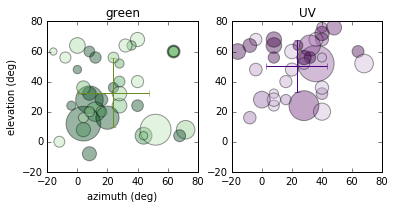

In [22]:
df2 = df_rf[(np.abs(df_rf['rf_best_s_x']*5.)+np.abs(df_rf['rf_best_s_y']*5.))/2. < 16.] # limit only to reasonable receptive field fits
df2 = df2[(df2['rf_best_x']-28)*4. > -20]
df2 = df2[(df2['rf_best_x']-28)*4. < 80]
df2 = df2[(df2['rf_best_y']-28)*4. < 80]

dfg = df2[df2['flash_bgi_best'] > 0.3] # get only the green units
dfu = df2[df2['flash_bgi_best'] < -0.3] # get only the UV units

bins = 12
rang = (-20,80)


fig = plt.figure(figsize=(6,6))
ax_scatter_g =  placeAxesOnGrid(fig,dim=(1,1),xspan=(0,0.45),yspan=(0.5,1.0))
ax_scatter_u =  placeAxesOnGrid(fig,dim=(1,1),xspan=(0.55,1.0),yspan=(0.5,1.0))

f=scatter_withcirclesize(ax_scatter_g,(dfg['rf_best_x']-28)*4.,(dfg['rf_best_y']-28)*4.,s=(np.abs(dfg['rf_best_s_x']*5.)+np.abs(dfg['rf_best_s_y']*5.))/2.,
                       c=np.array(dfg['flash_bgi_best']).tolist(),alpha=0.4,cmap=plt.cm.PRGn)
f=scatter_withcirclesize(ax_scatter_u,(dfu['rf_best_x']-28)*4.,(dfu['rf_best_y']-28)*4.,s=(np.abs(dfu['rf_best_s_x']*5.)+np.abs(dfu['rf_best_s_y']*5.))/2.,
                       c=np.array(dfu['flash_bgi_best']).tolist(),alpha=0.4,cmap=plt.cm.PRGn)


mean_x_g = np.mean((dfg['rf_best_x']-28)*4.)
std_x_g = np.std((dfg['rf_best_x']-28)*4.)
ste_x_g = std_x_g / np.sqrt(len(dfg['rf_best_x']))
mean_y_g = np.mean((dfg['rf_best_y']-28)*4.)
std_y_g = np.std((dfg['rf_best_y']-28)*4.)
ste_y_g = std_y_g/ np.sqrt(len(dfg['rf_best_y']))
f=ax_scatter_g.errorbar([mean_x_g],[mean_y_g],yerr=[std_y_g],xerr=[std_x_g],color=Green)

mean_x_u = np.mean((dfu['rf_best_x']-28)*4.)
std_x_u = np.std((dfu['rf_best_x']-28)*4.)
ste_x_u = std_x_u / np.sqrt(len(dfu['rf_best_x']))
mean_y_u = np.mean((dfu['rf_best_y']-28)*4.)
std_y_u = np.std((dfu['rf_best_y']-28)*4.)
ste_y_u = std_y_u/ np.sqrt(len(dfu['rf_best_y']))
f=ax_scatter_u.errorbar([mean_x_u],[mean_y_u],yerr=[std_y_u],xerr=[std_x_u],color=UV)

for ax_scatter in [ax_scatter_g,ax_scatter_u]:
    ax_scatter.set_xlim(rang[0],rang[1]);
    ax_scatter.set_ylim(rang[0],rang[1]);
    ax_scatter.set_aspect('equal')
ax_scatter_g.set_xlabel('azimuth (deg)')
ax_scatter_g.set_ylabel('elevation (deg)')
ax_scatter_g.set_title('green')
dump=ax_scatter_u.set_title('UV')


In [23]:
ttest_ind([(dfu['rf_best_x']-28)*4.,(dfu['rf_best_y']-28)*4.],
          [(dfg['rf_best_x']-28)*4.,(dfg['rf_best_y']-28)*4.],axis=1)

Ttest_indResult(statistic=array([-0.14541472,  3.71690293]), pvalue=array([  8.84778805e-01,   3.89352479e-04]))

<div> histogram of receptive field radius</div> 
<div> Figure 3E</div> 

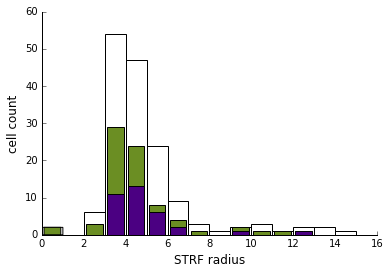

In [24]:
df2 = df_rf[(np.abs(df_rf['rf_best_s_x']*5.)+np.abs(df_rf['rf_best_s_y']*5.))/2. < 16.] # limit only to reasonable receptive fields
df2 = df2[(df2['rf_best_x']-28)*4. > -20]
df2 = df2[(df2['rf_best_x']-28)*4. < 80]
df2 = df2[(df2['rf_best_y']-28)*4. < 80]

dfu = df2[df2['flash_bgi_best'] < -0.3]
dfg = df2[df2['flash_bgi_best'] > 0.3]

plt.figure()
plt.hist((np.abs(df2['rf_best_s_x']*5.)+np.abs(df2['rf_best_s_y']*5.))/2.,bins=15,range=(0,15),normed=False,color='#FFFFFF')
#plt.hist(,bins=15,range=(0,15),normed=False)
plt.hist((np.array(np.abs(dfu['rf_best_s_x']*5.)+np.abs(dfu['rf_best_s_y']*5.))/2.,
         np.array(np.abs(dfg['rf_best_s_x']*5.)+np.abs(dfg['rf_best_s_y']*5.))/2.),
            bins=15,range=(0,15),normed=False,stacked=True,color=(UV,Green))
plt.xlabel('STRF radius',size=12)
plt.ylabel('cell count',size=12)
#plt.gca().set_aspect('equal')
plt.gca().tick_params(axis='both',labelsize=12)
cleanAxes(plt.gca(),bottomLabels=True,leftLabels=True)

<div> histogram of receptive field aspect ratios</div>
<div> Figure 3F</div> 


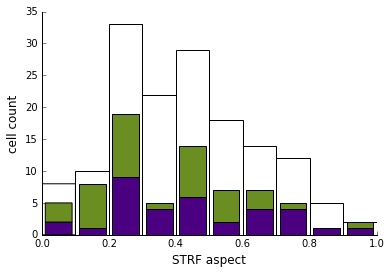

In [25]:
rf_aspect = []
for i in range(np.shape(df2)[0]):
    if np.abs(df_rf['rf_green_s_x'][i]) > np.abs(np.abs(df_rf['rf_green_s_y'][i])):
        rf_aspect.extend([np.abs(df_rf['rf_green_s_y'][i])/np.abs(df_rf['rf_green_s_x'][i])])
    else:
        rf_aspect.extend([np.abs(df_rf['rf_green_s_x'][i])/np.abs(df_rf['rf_green_s_y'][i])])
df2['rf_aspect']=rf_aspect

df2 = df_rf[(np.abs(df_rf['rf_best_s_x']*5.)+np.abs(df_rf['rf_best_s_y']*5.))/2. < 16.] # limit only to reasonable receptive fields
df2 = df2[(df2['rf_best_x']-28)*4. > -20]
df2 = df2[(df2['rf_best_x']-28)*4. < 80]
df2 = df2[(df2['rf_best_y']-28)*4. < 80]

dfu = df2[df2['flash_bgi_best'] < -0.3]
dfg = df2[df2['flash_bgi_best'] > 0.3]

plt.figure()
plt.hist(df2['rf_aspect'],bins=10,range=(0,1),normed=False,color='#FFFFFF')
plt.hist((np.array(dfu['rf_aspect']),
         np.array(dfg['rf_aspect'])),
            bins=10,range=(0,1),normed=False,stacked=True,color=(UV,Green))

plt.xlabel('STRF aspect',size=12)
plt.ylabel('cell count',size=12)
#plt.gca().set_aspect('equal')
plt.gca().tick_params(axis='both',labelsize=12)
cleanAxes(plt.gca(),bottomLabels=True,leftLabels=True)

<br></br>
<br></br>
<div style="font-size:16pt;color:#000000"><strong><font size='20' color='red'>Figure 4</font></strong></div>

<div> on and off latencies to green flashes</div> <div> Figure 4A</div> 

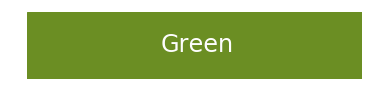

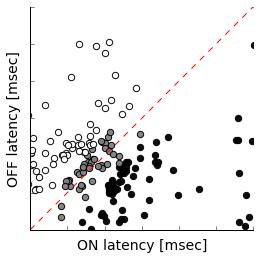

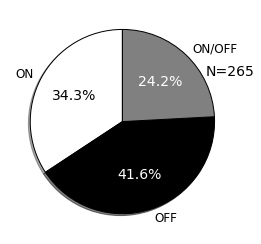

In [26]:
stim_color = 'green'
#annotate the plots
f,ax = plt.subplots(1,1)
ax.add_patch(patches.Rectangle((0,0),1,1,color=Green))
ax.text(0.4,0.4,r'Green',color='white',fontsize=24)
ax.axis('off')
ax.set_aspect(0.2)

latency_label_temp = np.zeros(np.shape(df)[0])-1
for i in range(np.shape(df)[0]):
    if  df['flash_'+stim_color+'_ON_latency'][i] - df['flash_'+stim_color+'_OFF_latency'][i] > 30.:
        latency_label_temp[i]=2
    else:
        if  df['flash_'+stim_color+'_ON_latency'][i] - df['flash_'+stim_color+'_OFF_latency'][i] < -30.:
            latency_label_temp[i]=0
        else:
            if np.abs( df['flash_'+stim_color+'_ON_latency'][i] - df['flash_'+stim_color+'_OFF_latency'][i]) < 30.:
                latency_label_temp[i]=1

plt.figure()
plt.scatter(df['flash_green_OFF_latency'][np.where(latency_label_temp==0)[0]],df['flash_green_ON_latency'][np.where(latency_label_temp==0)[0]],edgecolor='k',facecolor='#000000',s=40,alpha=0.95)
plt.scatter(df['flash_green_OFF_latency'][np.where(latency_label_temp==1)[0]],df['flash_green_ON_latency'][np.where(latency_label_temp==1)[0]],edgecolor='k',facecolor='#808080',s=40,alpha=0.95)
plt.scatter(df['flash_green_OFF_latency'][np.where(latency_label_temp==2)[0]],df['flash_green_ON_latency'][np.where(latency_label_temp==2)[0]],edgecolor='k',facecolor='#FFFFFF',s=40,alpha=0.95)
plt.xlim(0,300);plt.ylim(0,300)
plt.xlabel('ON latency [msec]',size=14)
plt.ylabel('OFF latency [msec]',size=14)
plt.gca().set_aspect('equal')
plt.plot([0,300],[0,300],'r--')
cleanAxes(plt.gca())
plt.gcf().savefig(os.path.join(path_to_data,'4Ascatter.eps'),format='eps')
# make a square figure and axes
plt.figure(figsize=(4,4))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
labels = 'ON', 'OFF', 'ON/OFF'
fracs = [np.shape(np.where(latency_label_temp==2)[0])[0], np.shape(np.where(latency_label_temp==0)[0])[0],np.shape(np.where(latency_label_temp==1)[0])[0]]
colors = ['white', 'black', 'grey']
ptches, texts, autotexts = plt.pie(fracs, labels=labels,colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90)
plt.gca().text(0.9,0.5,'N='+str(len(latency_label_temp)),size=14)
for text in texts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_fontsize(14)
autotexts[2].set_color('white')
autotexts[1].set_color('white')

plt.gcf().savefig(os.path.join(path_to_data,'4A.eps'),format='eps')

<div> on and off latencies to UV flashes</div> <div> Figure 4B</div> 

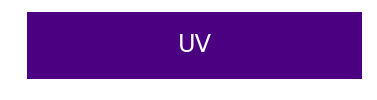

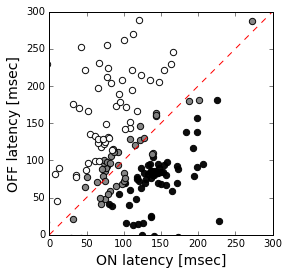

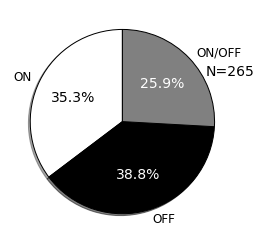

In [27]:
stim_color = 'UV'
#annotate the plots
f,ax = plt.subplots(1,1)
ax.add_patch(patches.Rectangle((0,0),1,1,color=UV))
ax.text(0.45,0.4,r'UV',color='white',fontsize=24)
ax.axis('off')
ax.set_aspect(0.2)

latency_label_temp = np.zeros(np.shape(df)[0])-1
for i in range(np.shape(df)[0]):
    if  df['flash_'+stim_color+'_ON_latency'][i] - df['flash_'+stim_color+'_OFF_latency'][i] > 30.:
        latency_label_temp[i]=2
    else:
        if  df['flash_'+stim_color+'_ON_latency'][i] - df['flash_'+stim_color+'_OFF_latency'][i] < -30.:
            latency_label_temp[i]=0
        else:
            if np.abs( df['flash_'+stim_color+'_ON_latency'][i] - df['flash_'+stim_color+'_OFF_latency'][i]) < 30.:
                latency_label_temp[i]=1
plt.figure()
plt.scatter(df['flash_'+stim_color+'_OFF_latency'][np.where(latency_label_temp==0)[0]],df['flash_'+stim_color+'_ON_latency'][np.where(latency_label_temp==0)[0]],edgecolor='k',facecolor='#000000',s=40,alpha=0.95)
plt.scatter(df['flash_'+stim_color+'_OFF_latency'][np.where(latency_label_temp==1)[0]],df['flash_'+stim_color+'_ON_latency'][np.where(latency_label_temp==1)[0]],edgecolor='k',facecolor='#808080',s=40,alpha=0.95)
plt.scatter(df['flash_'+stim_color+'_OFF_latency'][np.where(latency_label_temp==2)[0]],df['flash_'+stim_color+'_ON_latency'][np.where(latency_label_temp==2)[0]],edgecolor='k',facecolor='#FFFFFF',s=40,alpha=0.95)
plt.xlim(0,300);plt.ylim(0,300)
plt.xlabel('ON latency [msec]',size=14)
plt.ylabel('OFF latency [msec]',size=14)
plt.gca().set_aspect('equal')
plt.plot([0,300],[0,300],'r--')
plt.gcf().savefig(os.path.join(path_to_data,'4Bscatter.eps'),format='eps')
# make a square figure and axes
plt.figure(figsize=(4,4))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
labels = 'ON', 'OFF', 'ON/OFF'
fracs = [np.shape(np.where(latency_label_temp==2)[0])[0], np.shape(np.where(latency_label_temp==0)[0])[0],np.shape(np.where(latency_label_temp==1)[0])[0]]
colors = ['white', 'black', 'grey']
ptches, texts, autotexts = plt.pie(fracs, labels=labels,colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90)
plt.gca().text(0.9,0.5,'N='+str(len(latency_label_temp)),size=14)
for text in texts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_fontsize(14)
autotexts[2].set_color('white')
autotexts[1].set_color('white')

plt.gcf().savefig(os.path.join(path_to_data,'4B.eps'),format='eps')

<div> green and uv latencies, for the appropriate sign flash</div> <div> Figure 4C</div> 
<br></br>
<div> difference between green and uv latencies, for appropriate sign flash</div> <div> Figure 4D</div> 

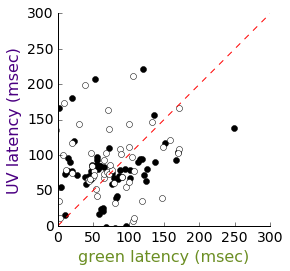

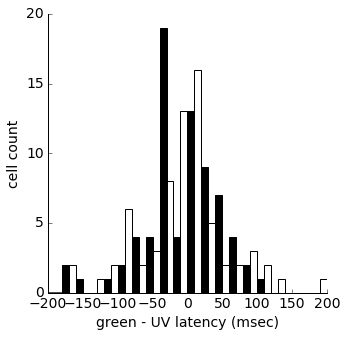

In [28]:

plt.figure(figsize=(4,4))
plt.plot(df['flash_green_ON_latency'][np.where(df['latency_label']==0)[0]],df['flash_UV_ON_latency'][np.where(df['latency_label']==0)[0]],'o',color='#000000',alpha=1.0)
plt.plot(df['flash_green_OFF_latency'][np.where(df['latency_label']==2)[0]],df['flash_UV_OFF_latency'][np.where(df['latency_label']==2)[0]],'o',color='#FFFFFF',alpha=1.0)
plt.xlim(0,300);plt.ylim(0,300)
plt.xlabel('green latency (msec)',size=16,color=Green)
plt.ylabel('UV latency (msec)',size=16,color=UV)
plt.gca().set_aspect('equal')
plt.plot([0,300],[0,300],'r--')
cleanAxes(plt.gca(),leftLabels=True,bottomLabels=True)
plt.tight_layout()
plt.gca().tick_params(axis='both',labelsize=14)
plt.gcf().savefig(os.path.join(path_to_data,'4C.eps'),format='eps')

plt.figure(figsize=(5,5))
latency_diff_on = df['flash_green_ON_latency'][np.where(df['latency_label']==0)[0]] - df['flash_UV_ON_latency'][np.where(df['latency_label']==0)[0]]
latency_diff_off = df['flash_green_OFF_latency'][np.where(df['latency_label']==2)[0]]- df['flash_UV_OFF_latency'][np.where(df['latency_label']==2)[0]]
f = plt.hist((np.array(np.nan_to_num(latency_diff_on)),np.array(np.nan_to_num(latency_diff_off))),range=(-200,200),bins=20,color=('#000000','#FFFFFF'),stacked=False,rwidth=10)
plt.xlabel('green - UV latency (msec)',size=14)
plt.ylabel('cell count',size=14)
cleanAxes(plt.gca(),leftLabels=True,bottomLabels=True)
plt.gca().tick_params(axis='both',labelsize=14)
plt.gcf().savefig(os.path.join(path_to_data,'4D.eps'),format='eps')

<br></br>
<br></br>
<div style="font-size:16pt;color:#000000"><strong><font size='20' color='red'>Figures 5+6</font></strong></div>
<br></br>
<div style="font-size:10pt;color:#999999">extract some information from the color exchange experiments. for use in figures 5 and 6</div>


In [29]:
exchange_class = []; exchange_class_fromplot = []; exchange_tsi = []
exchange_gdark = []; exchange_gbright = []; exchange_ubright = []; exchange_udark = []
exchange_g_psths = []; exchange_u_psths = [];

pre=0.25
post=1.9
binsize=0.02

for i in range(np.shape(df)[0]): #go through each cell in the dataframe
    nwb_data = data[df['Experiment'][i]]
    cell = str(str(df['Cell'][i]))
    mx =0 # for finding the biggest response and measuring transient-sustained index
    
    #calculate the PSTH for each condition
    if 'color_exchange_uv' in nwb_data['stimulus']['presentation'].keys() or 'exchange_uv' in nwb_data['stimulus']['presentation'].keys():
        if cell not in np.array(nwb_data['processing']['LGN']['UnitTimes']): # make sure we have this cell #
            for parameter in [exchange_u_psths,exchange_udark,exchange_ubright]:
                parameter.extend([np.nan])
        else:
            if 'color_exchange_uv' not in nwb_data['stimulus']['presentation'].keys():
                stimulus_name = 'exchange_uv'
            else:
                stimulus_name = 'color_exchange_uv'
            psths={}  
            #iterate over each possible test color, find the timestamps of stimulus, calculate psth
            for test_color_level in np.unique(np.array(nwb_data['stimulus']['presentation'][stimulus_name]['data'])[:,3]):
                trials = np.where(np.array(nwb_data['stimulus']['presentation'][stimulus_name]['data'])[:,3]==test_color_level)[0]
                psth = psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                                 np.array(nwb_data['stimulus']['presentation'][stimulus_name]['timestamps'])[trials],
                                 binsize=binsize,pre=pre,post=post,timeDomain=True,output='hist')
                psths[str(test_color_level)]=psth
                
                #test if this is the biggest response yet. if so, store the tsi
                if np.mean(psth[0][12:26]) > mx:
                    transient = np.max(psth[0][12:66])
                    sustained = np.mean(psth[0][12:66])
                    tsi = (transient - sustained) / (transient + sustained)
                    mx =np.max(psth[0][12:66])
                
            exchange_u_psths.extend([psths])
            exchange_ubright.extend([(np.mean(psths[str(1.0)][0][16:66])+np.mean(psths[str(0.8)][0][12:66])) / 2.]) # based on 20msec bins and 250 msec pre-stimulus time 
            exchange_udark.extend([(np.mean(psths[str(-1.0)][0][16:66])+np.mean(psths[str(-0.8)][0][12:66])) / 2.])
            
    else:
        for parameter in [exchange_u_psths,exchange_udark,exchange_ubright]:
            parameter.extend([np.nan])
            
    if 'color_exchange_green' in nwb_data['stimulus']['presentation'].keys() or 'exchange_green' in nwb_data['stimulus']['presentation'].keys():
        if cell not in np.array(nwb_data['processing']['LGN']['UnitTimes']): # make sure we have this cell #
            for parameter in [exchange_g_psths,exchange_gdark,exchange_gbright]:
                parameter.extend([np.nan])
        else:
            if 'color_exchange_green' not in nwb_data['stimulus']['presentation'].keys():
                stimulus_name = 'exchange_green'
            else:
                stimulus_name = 'color_exchange_green'
            psths={}; 
            #iterate over each possible test color, find the timestamps of stimulus, calculate psth
            for test_color_level in np.unique(np.array(nwb_data['stimulus']['presentation'][stimulus_name]['data'])[:,3]):
                trials = np.where(np.array(nwb_data['stimulus']['presentation'][stimulus_name]['data'])[:,3]==test_color_level)[0]
                psth = psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                                 np.array(nwb_data['stimulus']['presentation'][stimulus_name]['timestamps'])[trials],
                                 binsize=binsize,pre=pre,post=post,timeDomain=True,output='hist')
                psths[str(test_color_level)]=psth
                
                #test if this is the biggest response yet. if so, store the tsi
                if np.mean(psth[0][12:26]) > mx:
                    transient = np.max(psth[0][12:66])
                    sustained = np.mean(psth[0][12:66])
                    tsi = (transient - sustained) / (transient + sustained)
                    mx =np.max(psth[0][12:66])
                
            exchange_g_psths.extend([psths])
            exchange_gbright.extend([(np.mean(psths[str(1.0)][0][16:66])+np.mean(psths[str(0.8)][0][12:66])) / 2.])
            exchange_gdark.extend([(np.mean(psths[str(-1.0)][0][16:66])+np.mean(psths[str(-0.8)][0][12:66])) / 2.])
    else:
        for parameter in [exchange_g_psths,exchange_gdark,exchange_gbright]:
            parameter.extend([np.nan])
            
    if mx > 0:
        exchange_tsi.extend([tsi])
    else:
        exchange_tsi.extend([np.nan])
        
    if df['Experiment'][i] in exchange_annotation.keys():
        if df['Cell'][i] in exchange_annotation[df['Experiment'][i]]['OFF_list']:
            exchange_class.extend(['OFF'])
        else:
            if df['Cell'][i] in exchange_annotation[df['Experiment'][i]]['ON_list']:
                exchange_class.extend(['ON'])
            else:
                if df['Cell'][i] in exchange_annotation[df['Experiment'][i]]['ONOFF_list']:
                    exchange_class.extend(['ONOFF'])  
                else:
                    if df['Cell'][i] in exchange_annotation[df['Experiment'][i]]['color_list']:
                        exchange_class.extend(['color'])
                    else:
                        exchange_class.extend([-1])    
    else:
        exchange_class.extend([-1])  
        
df['exchange_gdark'] = exchange_gdark; df['exchange_gbright'] = exchange_gbright
df['exchange_ubright'] = exchange_ubright; df['exchange_udark'] = exchange_udark
df['exchange_g_psths']=exchange_g_psths; df['exchange_u_psths']=exchange_u_psths
df['exchange_tsi']=exchange_tsi; df['exchange_class']=exchange_class

<div style="font-size:12pt;color:#000000"> this is an illustrated example, produced by hand elsewhere</div> 
<div style="font-size:10pt;color:#000000"> Figure 5A</div>

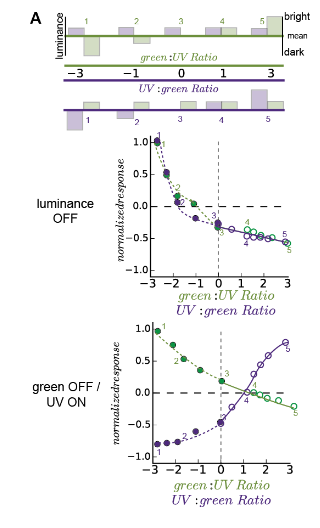

In [30]:
f,ax=plt.subplots(1,1,figsize=(5,16))
ax.imshow(imread(os.path.join(path_to_data,'images','fig5a.png')))
dump=ax.axis('off')

<div style="font-size:12pt;color:#000000"> Example non-opponent OFF cell in the color exchange protocol</div> 
<div style="font-size:10pt;color:#000000"> Figure 6A</div>

/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2

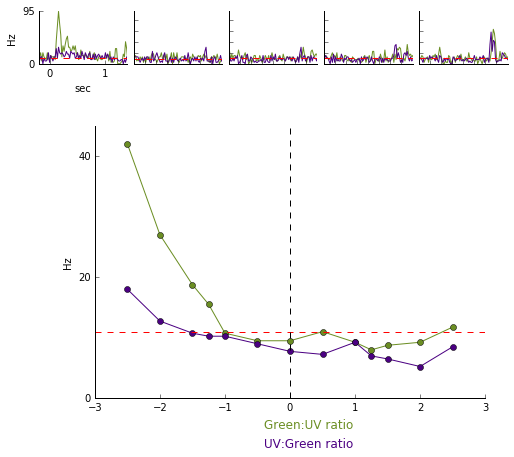

In [31]:
test_color = str(-1.0)
experiment = 'M186118'
cell=371

fig = plt.figure(figsize=(10,7.3))
for i,test_color in enumerate([-1.0,-0.4,0.0,0.4,1.0]):
    test_color= str(test_color)
    ax =  placeAxesOnGrid(fig,dim=(1,1),xspan=(0+i*0.68/4.,0+i*0.68/4.+0.64/4.),yspan=(0.0,0.45/3.3))
    ax.plot(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][1],
         df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][0],
        color=Green)
    ax.plot(df[df.Experiment==experiment][df.Cell==cell]['exchange_g_psths'].tolist()[0][test_color][1],
         df[df.Experiment==experiment][df.Cell==cell]['exchange_g_psths'].tolist()[0][test_color][0],
        color=UV)
    
    pre=np.where(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][1]<0.1)[0]
    ax.axhline((np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][0][pre])+
                      np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_g_psths'].tolist()[0][test_color][0][pre]))/2.,
                      color='r',ls='--')
    ax.set_xlim(-0.2,1.4)
    ax.set_ylim(0,95)
    if i>0:
        cleanAxes(ax)
    else:
        cleanAxes(ax,leftLabels=True,bottomLabels=True)
        ax.set_xticks([0,1.]); ax.set_xlabel('sec')
        ax.set_yticks([0,95]);ax.set_ylabel('Hz')

        
ax =  placeAxesOnGrid(fig,dim=(1,1),xspan=(0.1,0.8),yspan=(0.45/3.3+0.15,0.95))  
all_test_colors = ['-1.0','-0.8','-0.6','-0.5','-0.4','-0.2','0.0','0.2','0.4','0.5','0.6','0.8','1.0']
responses = []; GUV_ratios = []
for i,test_color in enumerate(all_test_colors):
    GUV_ratios.extend([float(test_color) / 0.4])
    response = np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][0][16:26])
    responses.extend([response])
ax.plot(GUV_ratios,responses,'-o',color=Green)
ax.text(-0.4,-5,r'Green:UV ratio',color=Green,fontsize=12)

responses = []; UVG_ratios = []
for i,test_color in enumerate(all_test_colors):
    UVG_ratios.extend([float(test_color) / 0.4])
    response = np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_g_psths'].tolist()[0][test_color][0][16:26])
    responses.extend([response])
ax.plot(UVG_ratios,responses,'-o',color=UV)
ax.text(-0.4,-8,r'UV:Green ratio',color=UV,fontsize=12)

ax.axhline((np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0]['-1.0'][0][pre])+
                  np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_g_psths'].tolist()[0]['-1.0'][0][pre]))/2.,
                  color='r',ls='--')
ax.axvline(0,ls='--',color='k')
ax.set_yticks([0,20,40]);ax.set_ylabel('Hz')
cleanAxes(ax,leftLabels=True,bottomLabels=True)

<div style="font-size:12pt;color:#000000"> Example opponent green-off / uv-on cell in the color exchange protocol</div> 
<div style="font-size:10pt;color:#000000"> Figure 6B</div>


/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2

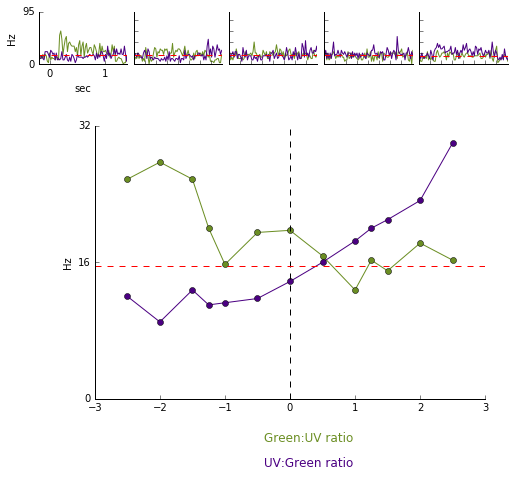

In [32]:
test_color = str(-1.0)
experiment = 'M186118'
cell=430

fig = plt.figure(figsize=(10,7.3))
for i,test_color in enumerate([-1.0,-0.4,0.0,0.4,1.0]):
    test_color= str(test_color)
    ax =  placeAxesOnGrid(fig,dim=(1,1),xspan=(0+i*0.68/4.,0+i*0.68/4.+0.64/4.),yspan=(0.0,0.45/3.3))
    ax.plot(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][1],
         df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][0],
        color=Green)
    ax.plot(df[df.Experiment==experiment][df.Cell==cell]['exchange_g_psths'].tolist()[0][test_color][1],
         df[df.Experiment==experiment][df.Cell==cell]['exchange_g_psths'].tolist()[0][test_color][0],
        color=UV)
    
    pre=np.where(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][1]<0.1)[0]
    ax.axhline((np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][0][pre])+
                      np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_g_psths'].tolist()[0][test_color][0][pre]))/2.,
                      color='r',ls='--')
    ax.set_xlim(-0.2,1.4)
    ax.set_ylim(0,95)
    if i>0:
        cleanAxes(ax)
    else:
        cleanAxes(ax,leftLabels=True,bottomLabels=True)
        ax.set_xticks([0,1.]); ax.set_xlabel('sec')
        ax.set_yticks([0,95]);ax.set_ylabel('Hz')

        
ax =  placeAxesOnGrid(fig,dim=(1,1),xspan=(0.1,0.8),yspan=(0.45/3.3+0.15,0.95))  
all_test_colors = ['-1.0','-0.8','-0.6','-0.5','-0.4','-0.2','0.0','0.2','0.4','0.5','0.6','0.8','1.0']
responses = []; GUV_ratios = []
for i,test_color in enumerate(all_test_colors):
    GUV_ratios.extend([float(test_color) / 0.4])
    response = np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][0][16:26])
    responses.extend([response])
ax.plot(GUV_ratios,responses,'-o',color=Green)
ax.text(-0.4,-5,r'Green:UV ratio',color=Green,fontsize=12)

responses = []; UVG_ratios = []
for i,test_color in enumerate(all_test_colors):
    UVG_ratios.extend([float(test_color) / 0.4])
    response = np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_g_psths'].tolist()[0][test_color][0][16:26])
    responses.extend([response])
ax.plot(UVG_ratios,responses,'-o',color=UV)
ax.text(-0.4,-8,r'UV:Green ratio',color=UV,fontsize=12)
ax.axvline(0,ls='--',color='k')
ax.axhline((np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0]['-1.0'][0][pre])+
                  np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_g_psths'].tolist()[0]['-1.0'][0][pre]))/2.,
                  color='r',ls='--')
ax.set_yticks([0,16,32]);ax.set_ylabel('Hz')
cleanAxes(ax,leftLabels=True,bottomLabels=True)

6C and 6D. classification of responses from the plots in 6A and 6B

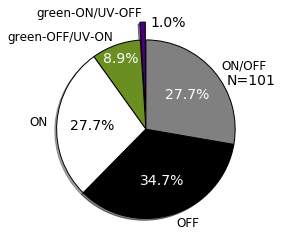

In [33]:
plt.figure(figsize=(4,4))
# The slices will be ordered and plotted counter-clockwise.
labels = 'green-ON/UV-OFF','green-OFF/UV-ON','ON','OFF','ON/OFF'
df2 = df[df.exchange_class!=-1]
fracs = [1/float(len(df2)),
         (len(df2[df2['exchange_class'] =='color'])-1)/float(len(df2)),
         len(df2[df2['exchange_class'] =='ON'])/float(len(df2)),
         len(df2[df2['exchange_class'] =='OFF'])/float(len(df2)),
         len(df2[df2['exchange_class'] =='ONOFF'])/float(len(df2))]
colors = [UV, Green, '#FFFFFF','#000000','grey']
#explode=(0, 0.05, 0, 0)

ptches, texts, autotexts = plt.pie(fracs, labels=labels,colors=colors,explode=(0.2,0,0,0,0),
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.
plt.gca().text(0.9,0.5,'N='+str(len(df2)),size=14)
for text in texts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_fontsize(14)
autotexts[1].set_position((-0.28,0.79));autotexts[0].set_position((0.25,1.2))
autotexts[1].set_color('white')
autotexts[3].set_color('white')
autotexts[4].set_color('white')

<br></br>
<br></br>
<div style="font-size:16pt;color:#000000"><strong><font size='20' color='red'>Figure 7</font></strong></div>

<div style="font-size:12pt;color:#000000"> Example transient and sustained cells, same example cells as Figure 6</div> 
<div style="font-size:10pt;color:#000000"> Figure 7A</div>

/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


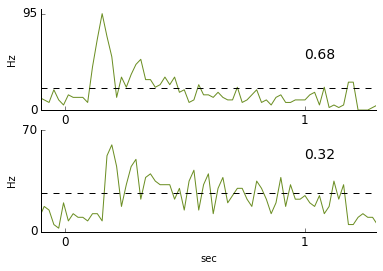

In [34]:
f,ax = plt.subplots(2,1)
experiment = 'M186118'
cell=371
test_color='-1.0'
ax[0].plot(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][1],
         df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][0],
        color=Green)

ax[0].set_yticks([0,95]);ax[0].set_ylabel('Hz')
ax[0].axhline(np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][0][12:66]),color='k',ls='--')
ax[0].text(1.0,50,'0.68',size=14)

experiment = 'M186118'
cell=430
ax[1].plot(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][1],
         df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][0],
        color=Green)
ax[1].set_yticks([0,70]);ax[1].set_ylabel('Hz')
ax[1].axhline(np.mean(df[df.Experiment==experiment][df.Cell==cell]['exchange_u_psths'].tolist()[0][test_color][0][12:66]),color='k',ls='--')
ax[1].set_xlabel('sec')
ax[1].text(1.0,50,'0.32',size=14)
for axis in ax:
    axis.set_xticks([0,1.]); 
    axis.set_xlim(-0.1,1.3)
    cleanAxes(axis,bottomLabels=True,leftLabels=True)
    axis.tick_params(axis='both',labelsize=12)

<div style="font-size:12pt;color:#000000">Histogram of transient - sustained indices</div> 
<div style="font-size:10pt;color:#000000"> Figure 7B</div>

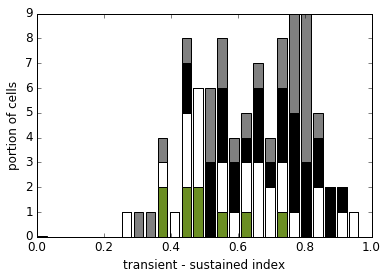

In [35]:
plt.figure()
f=plt.hist((np.array(df[df['exchange_class']=='color']['exchange_tsi']),
         np.array(df[df['exchange_class']=='ON']['exchange_tsi']),
         np.array(df[df['exchange_class']=='OFF']['exchange_tsi']),
         np.array(df[df['exchange_class']=='ONOFF']['exchange_tsi']),
         ),histtype='barstacked',color=[Green,'#FFFFFF','#000000','#808080'],
         bins=28,range=(0,1),normed=False)
plt.xlabel('transient - sustained index',size=12)
plt.ylabel('portion of cells',size=12)
#cleanAxes(plt.gca())
plt.gca().tick_params(axis='both',labelsize=12)
#plt.gcf().savefig(os.path.join(path_to_data,'6B.eps'),format='eps')

<div style="font-size:12pt;color:#000000"> Hartigan Dip test</div> 
<div style="font-size:10pt;color:#000000"> as requested by reviewer, p = </div>

In [56]:
f=np.histogram(np.array(df['exchange_tsi']),
         bins=28,range=(0,1),normed=False)
if has_dip:
    print dip.dip(f[0],f[1][:-1])[0]
else:
    print 'no dip_test package found.'

0.0482456140351


<br></br>
<br></br>
<div style="font-size:16pt;color:#000000"><strong><font size='20' color='red'>Figure 8</font></strong></div>

<div style="font-size:12pt;color:#000000">Example color opponent spatiotemporal receptive fields</div> 
<div style="font-size:10pt;color:#000000"> Figure 8A,B</div>

<div style="font-size:12pt;color:#000000">Visuotopic location and size of opponent cell STRFs </div> 
<div style="font-size:10pt;color:#000000"> Figure 8C</div>

/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/administrator/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


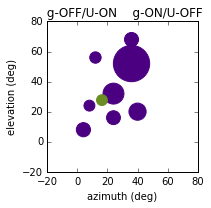

In [57]:
df2 = df_rf[(np.abs(df_rf['rf_best_s_x']*5.)+np.abs(df_rf['rf_best_s_y']*5.))/2. < 16.] # limit only to reasonable receptive field fits
df2 = df2[(df2['rf_best_x']-28)*4. > -20]
df2 = df2[(df2['rf_best_x']-28)*4. < 80]
df2 = df2[(df2['rf_best_y']-28)*4. < 80]

df2_color = df2[df2['exchange_class'] == 'color'] # get only the opponent units
df_gOFF = df2_color[df2.Cell != 256]
df_gON = df2_color[df2.Cell == 256]

fig = plt.figure(figsize=(6,6))
ax_scatter =  placeAxesOnGrid(fig,dim=(1,1),xspan=(0,0.45),yspan=(0.5,1.0))

#plot all the oppo cells with STRFs
f=scatter_withcirclesize(ax_scatter,(df_gOFF['rf_best_x']-28)*4.,(df_gOFF['rf_best_y']-28)*4.,s=(np.abs(df_gOFF['rf_best_s_x']*5.)+np.abs(df_gOFF['rf_best_s_y']*5.))/2.,
                         c=UV)
f=scatter_withcirclesize(ax_scatter,(df_gON['rf_best_x']-28)*4.,(df_gON['rf_best_y']-28)*4.,s=(np.abs(df_gON['rf_best_s_x']*5.)+np.abs(df_gON['rf_best_s_y']*5.))/2.,
                         c=Green)


for ax_scatter in [ax_scatter,ax_scatter]:
    ax_scatter.set_xlim(rang[0],rang[1]);
    ax_scatter.set_ylim(rang[0],rang[1]);
    ax_scatter.set_aspect('equal')
ax_scatter.set_xlabel('azimuth (deg)')
ax_scatter.set_ylabel('elevation (deg)')
ax_scatter.set_title(' g-OFF/U-ON    g-ON/U-OFF')

plt.gcf().savefig(os.path.join(path_to_data,'fig7A.eps'),format='eps')

<div style="font-size:12pt;color:#000000"> Histograms of parameters from opponent cell STRFs</div> 
<div style="font-size:10pt;color:#000000"> Figure 8D,E</div>

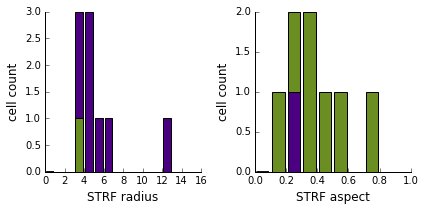

In [58]:
f,ax = plt.subplots(1,2,figsize=(6,3))

ax[0].hist((np.array(np.abs(df_gON['rf_best_s_x']*5.)+np.abs(df_gON['rf_best_s_y']*5.))/2.,
         np.array(np.abs(df_gOFF['rf_best_s_x']*5.)+np.abs(df_gOFF['rf_best_s_y']*5.))/2.),
            bins=15,range=(0,15),normed=False,stacked=True,color=(Green,UV))
ax[0].set_xlabel('STRF radius',size=12)
ax[0].set_ylabel('cell count',size=12)
#ax[0].set_aspect('equal')
ax[0].tick_params(axis='both',labelsize=12)
cleanAxes(ax[0],bottomLabels=True,leftLabels=True)

ax[1].hist((np.array(df_gON['rf_aspect']),
         np.array(df_gOFF['rf_aspect'])),
            bins=10,range=(0,1),normed=False,stacked=True,color=(UV,Green))

ax[1].set_xlabel('STRF aspect',size=12)
ax[1].set_ylabel('cell count',size=12)
#ax[1].set_aspect('equal')
ax[1].tick_params(axis='both',labelsize=12)
cleanAxes(ax[1],bottomLabels=True,leftLabels=True)

plt.tight_layout()


<div style="font-size:10pt;color:#000000"> t-test, comparing opponent and non-opponent cells</div> 

In [ ]:
df2_noncolor = df2[df2['exchange_class'] != 'color']#df2_color = df2_color[df2_color.rf_best_y<40]
t,p = ttest_ind(np.array([(df2_color['rf_best_x']-28)*4.,(df2_color['rf_best_y']-28)*4.]),
          np.array([(df2_noncolor['rf_best_x']-28)*4.,(df2_noncolor['rf_best_y']-28)*4.]),
          axis=1)
print 'difference in X, p = '+str(p[0])
print 'difference in Y, p = '+str(p[1])

difference in X, p = 0.885004551624
difference in Y, p = 0.45925919465



<br></br>
<br></br>
<div style="font-size:16pt;color:#000000"><strong><font size='20' color='red'>Figure 9</font></strong></div>

<div style="font-size:10pt;color:#999999"> ...get contrast reponses and fit with hyperbolic ratio</div>

In [ ]:
contrast_c50_u = []
contrast_halfmax_u = []
contrast_n_u =[]
contrast_cov_u =[]
contrast_c50_g = []
contrast_halfmax_g = []
contrast_n_g =[]
contrast_cov_g =[]
contrast_r2_u=[]
contrast_r2_g=[]

pre=0.00
post=1.5
binsize=0.01

for i in range(np.shape(df)[0]):
    nwb_data = data[df.Experiment[i]]
    cell = str(str(df['Cell'][i]))
    
    #get the name of the contrast stimuli, which is variable again because of naming inconsitency during experiments.
    uv_key = False; green_key = False
    for stim in  nwb_data['stimulus']['presentation'].keys():
        if 'contrast' in stim:
            if 'uv' in stim:
                uv_key = stim
            if 'green' in stim or 'vis' in stim:
                green_key = stim
                
    if uv_key and green_key and df.Experiment[i] != 'M192079':
        if cell not in np.array(nwb_data['processing']['LGN']['UnitTimes']): # make sure we have this cell #
            for parameter in [contrast_c50_u,contrast_halfmax_u,contrast_n_u,contrast_cov_u,contrast_c50_g,contrast_halfmax_g,contrast_n_g,contrast_cov_g,contrast_r2_g,contrast_r2_u]:
                parameter.extend([np.nan])
        else:
            cons_green = []
            f1_green = []
            f0_green = []
            contrasts_in_data = np.unique(nwb_data['stimulus']['presentation'][green_key]['data'][:,np.where(np.array(nwb_data['stimulus']['presentation'][green_key]['features']) == 'Contrast')[0][0]])
            for contrast in contrasts_in_data:
                cons_green.extend([contrast])
                trials = np.where(np.array(nwb_data['stimulus']['presentation'][green_key]['data'])[:,0]==contrast)[0]
                psth,t = psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                                 np.array(nwb_data['stimulus']['presentation'][green_key]['timestamps'])[trials],
                                 binsize=binsize,pre=pre,post=post,timeDomain=True,output='hist')
                f1_green.extend([f1(psth[np.where(t>0)[0][0]:np.where(t>1.0)[0][0]],3)])
                f0_green.extend([np.mean(psth[np.where(t>0)[0][0]:np.where(t>1.0)[0][0]])])
            try:
                (r0,rmax,c50,n),pcov, infodict, mesg, ier =curve_fit(hyperbolicratio,
                                               np.unique(np.array(nwb_data['stimulus']['presentation'][green_key]['data'])[:,0]).astype(np.float64),
                                                           np.array(f1_green).astype(np.float64),
                                                       p0=(np.min(f1_green),
                                                          np.max(f1_green),
                                                           0.4,
                                                           1),full_output=True)
                xp = np.linspace(0,1,1001)
                pxp = r0 + rmax * ( xp**n / (c50**n+xp**n))#hyperbolic
                contrast_halfmax_g.extend([xp[np.where(pxp > np.max(pxp)/2.)[0][0]]])
                contrast_c50_g.extend([c50])
                contrast_n_g.extend([n])
                contrast_cov_g.extend([np.mean(pcov[0][0]+pcov[1][1]+pcov[2][2]+pcov[3][3])])
                ss_err=(infodict['fvec']**2).sum()
                ss_tot=((np.array(f1_green).astype(np.float64)-np.array(f1_green).astype(np.float64).mean())**2).sum()
                rsquared = 1-(ss_err/ss_tot)
#                 print str(rsquared) + '  ' + str(c50)
                contrast_r2_g.extend([rsquared])
                
            except:
#                 print 'fit failed: '+df['Experiment'][i] + ' cell: ' +str(cell)+' green'
                contrast_c50_g.extend([np.nan])
                contrast_halfmax_g.extend([np.nan])
                contrast_n_g.extend([np.nan])
                contrast_cov_g.extend([(np.nan)])
                contrast_r2_g.extend([(np.nan)])

            cons_uv = []
            f1_uv = []
            f0_uv = []
            contrasts_in_data = np.unique(nwb_data['stimulus']['presentation'][uv_key]['data'][:,np.where(np.array(nwb_data['stimulus']['presentation'][uv_key]['features']) == 'Contrast')[0][0]])
            for contrast in contrasts_in_data:
                try:
                    trials = np.where(np.array(nwb_data['stimulus']['presentation'][uv_key]['data'])[:,0]==contrast)[0]
                    psth,t = psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                                     np.array(nwb_data['stimulus']['presentation'][uv_key]['timestamps'])[trials],
                                     binsize=binsize,pre=pre,post=post,timeDomain=True,output='hist')
                    f1_uv.extend([f1(psth[np.where(t>0)[0][0]:np.where(t>1.0)[0][0]],3)])
                    f0_uv.extend([np.mean(psth[np.where(t>0)[0][0]:np.where(t>1.0)[0][0]])])
                except:
                    pass#print df.Experiment[i] + '  '+cell
            try:
                popt, pcov, infodict, errmsg, ier 
                (r0,rmax,c50,n),pcov, infodict, mesg, ier =curve_fit(hyperbolicratio,
                                                       np.unique(np.array(nwb_data['stimulus']['presentation'][green_key]['data'])[:,0]).astype(np.float64),
                                                           np.array(f1_uv).astype(np.float64),
                                                       p0=(np.min(f1_uv),
                                                          np.max(f1_uv),
                                                           0.4,
                                                           1),full_output=True)
                xp = np.linspace(0,1,1001)
                pxp = r0 + rmax * ( xp**n / (c50**n+xp**n))#hyperbolic
                contrast_halfmax_u.extend([xp[np.where(pxp > np.max(pxp)/2.)[0][0]]])
                contrast_n_u.extend([n])
                contrast_c50_u.extend([c50])
                contrast_cov_u.extend([np.mean(pcov[0][0]+pcov[1][1]+pcov[2][2]+pcov[3][3])])
                ss_err=(infodict['fvec']**2).sum()
                ss_tot=((np.array(f1_uv).astype(np.float64)-np.array(f1_uv).astype(np.float64).mean())**2).sum()
                print 'ss:'+str(ss_tot)
                contrast_r2_u.extend([1-(ss_err/ss_tot)])
            except:
#                 print 'fit failed: '+df['Experiment'][i] + ' cell: ' +str(cell)+' uv'
                contrast_c50_u.extend([np.nan])
                contrast_halfmax_u.extend([np.nan])
                contrast_n_u.extend([np.nan])
                contrast_cov_u.extend([(np.nan)])
                contrast_r2_u.extend([(np.nan)])

    else:
        for parameter in [contrast_c50_u,contrast_halfmax_u,contrast_n_u,contrast_cov_u,contrast_c50_g,contrast_halfmax_g,contrast_n_g,contrast_cov_g,contrast_r2_g,contrast_r2_u]:
            parameter.extend([np.nan])
#         print df['Experiment'][i] + 'has no contrast data.'
        
df['contrast_c50_u']=contrast_c50_u
df['contrast_halfmax_u']=contrast_halfmax_u
df['contrast_n_u']=contrast_n_u
df['contrast_c50_g']=contrast_c50_g
df['contrast_halfmax_g']=contrast_halfmax_g
df['contrast_n_g']=contrast_n_g
df['contrast_cov_u']=contrast_cov_u
df['contrast_cov_g']=contrast_cov_g
df['contrast_r2_u']=contrast_r2_u
df['contrast_r2_g']=contrast_r2_g

<div style="font-size:12pt;color:#000000">Example responses to increasing UV and green contrast</div> 
<div style="font-size:10pt;color:#000000"> Figure 9A</div>

In [ ]:
green_key = 'contrast_green'
uv_key = 'contrast_uv'
pre=0.0
post=1.5
binsize=0.02
nwb_data=data['M186118']
#for cell in df.Cell[df.Experiment=='M186118']:
cell=str(366)
r = []
f1s_g = [];f1s_u = []
f,ax = plt.subplots(2,1,figsize=(6,3))
for i,contrast in enumerate(np.unique(np.array(nwb_data['stimulus']['presentation'][green_key]['data'])[:,0])):
    trials = np.where(np.array(nwb_data['stimulus']['presentation'][green_key]['data'])[:,0]==contrast)[0]
    psth,t = psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                     np.array(nwb_data['stimulus']['presentation'][green_key]['timestamps'])[trials],
                     binsize=binsize,pre=pre,post=post,timeDomain=True,output='hist')
    ax[0].plot(t,psth,color=Green,alpha=i/10.)
    ax[0].set_xlim(0,1.5)
    r.extend([np.mean(psth[np.where(t>0)[0][0]:np.where(t>1.0)[0][0]])])
    f1s_g.extend([f1(psth[np.where(t>0)[0][0]:np.where(t>1.0)[0][0]],3)])

    trials = np.where(np.array(nwb_data['stimulus']['presentation'][uv_key]['data'])[:,0]==contrast)[0]
    psth,t = psth_line(np.array(nwb_data['processing']['LGN']['UnitTimes'][cell]['times']),
                     np.array(nwb_data['stimulus']['presentation'][uv_key]['timestamps'])[trials],
                     binsize=binsize,pre=pre,post=post,timeDomain=True,output='hist')
    ax[1].plot(t,psth,color=UV,alpha=i/10.)
    ax[1].set_xlim(0,1.5)
    r.extend([np.mean(psth[np.where(t>0)[0][0]:np.where(t>1.0)[0][0]])])
    f1s_u.extend([f1(psth[np.where(t>0)[0][0]:np.where(t>1.0)[0][0]],3)])
ax[1].set_ylabel('Hz')
ax[1].set_xlabel('time (sec)')
cleanAxes(ax[0],leftLabels=True);
cleanAxes(ax[1],bottomLabels=True,leftLabels=True)
plt.gcf().savefig(os.path.join(path_to_data,'8A.eps'),format='eps')
plt.gcf().savefig(os.path.join(path_to_data,'8A.tiff'),format='tiff',dpi=300)

<div style="font-size:12pt;color:#000000">Example contrast response functions</div> 
<div style="font-size:10pt;color:#000000"> Figure 9B</div>

In [ ]:
plt.plot(np.unique(np.array(nwb_data['stimulus']['presentation'][green_key]['data'])[:,0]),
         np.array(f1s_g)/np.max(f1s_g),'o',color=Green)
(r0,rmax,c50,n),pcov=curve_fit(hyperbolicratio,
                               np.unique(np.array(nwb_data['stimulus']['presentation'][green_key]['data'])[:,0]).astype(np.float64),
                               np.array(f1s_g).astype(np.float64),
                               p0=(np.min(f1s_g), np.max(f1s_g), 0.4, 1))
xp = np.linspace(0,1,1001)
pxp = r0 + rmax * ( xp**n / (c50**n+xp**n))#hyperbolic
plt.plot(xp,pxp/np.max(f1s_g),'k-',color=Green,linewidth=1)   
plt.plot(np.unique(np.array(nwb_data['stimulus']['presentation'][green_key]['data'])[:,0]),
         np.array(f1s_u)/np.max(f1s_u),'o',color=UV)
(r0,rmax,c50,n),pcov, infodict, mesg, ier =curve_fit(hyperbolicratio,
                                       np.unique(np.array(nwb_data['stimulus']['presentation'][green_key]['data'])[:,0]).astype(np.float64),
                                           np.array(f1s_u).astype(np.float64),
                                       p0=(np.min(f1s_u),
                                          np.max(f1s_u),
                                           0.4,
                                           1),full_output=True)
xp = np.linspace(0,1,1001)
pxp = r0 + rmax * ( xp**n / (c50**n+xp**n))#hyperbolic
plt.plot(xp,pxp/np.max(f1s_u),'k-',color=UV,linewidth=1)   
plt.ylim(0,1.1)
plt.ylabel('f1 (normalized)')
plt.xlabel('contrast %')
plt.xscale('log');plt.xlim(0.05,1.1)
cleanAxes(plt.gca(),leftLabels=True,bottomLabels=True)
plt.gcf().savefig(os.path.join(path_to_data,'8B.eps'),format='eps')
plt.gcf().savefig(os.path.join(path_to_data,'8B.tiff'),format='tiff',dpi=300)

<div style="font-size:12pt;color:#000000">Histogram of c50 from contrast response functions</div> 
<div style="font-size:10pt;color:#000000"> Figure 9C</div>

In [ ]:
df2 = df[df.contrast_r2_g > 0.60]
print df2.shape

f=plt.hist([df2.contrast_c50_g[df2.exchange_class=='ON'],
          df2.contrast_c50_g[df2.exchange_class=='OFF'],
         df2.contrast_c50_g[df2.exchange_class=='ONOFF'],
         df2.contrast_c50_g[df2.exchange_class=='color']],
         range=(0,1),bins=20,color=['#FFFFFF','#000000','grey',Green],
        histtype='barstacked')
plt.ylabel('cell count')
plt.xlabel('c50')
plt.gcf().savefig(os.path.join(path_to_data,'8C.eps'),format='eps')


<br></br>
<br></br>
<div style="font-size:16pt;color:#000000"><strong><font size='20' color='red'>Figure 10</font></strong></div>

<div style="font-size:12pt;color:#000000">CSD data shown here calulated from time series; NWB files only include spike times. </div> 
<div style="font-size:10pt;color:#000000"> Figure 10A</div>

In [ ]:
f,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(imread(os.path.join(path_to_data,'images','fig9.png')))
dump=ax.axis('off')

<div style="font-size:12pt;color:#000000">parameters from the CSD analysis propagated to this notebook, for statistics</div> 

In [ ]:
f_180417 = [(800,1.58),(0.617,0.8397),(0.6873,0.9122)]
f_186101 = [(800,2.5136),(0.7566,1.57),(0.8974,1.7421)]
f_186100 = [(800,2.545),(1.1368,1.888),(1.1092,1.9691)]
f_186098 = [(800,3.2),(0.8626,1.9459),(0.9825,2.031)]
f_192079 = [(1000,1.94),(0.5242,0.99),(0.68,1.1955)]

In [ ]:
green_top=[];uv_top=[];green_bottom=[];uv_bottom=[]
plt.figure()
for i,exp in enumerate([f_180417,f_186101,f_186100,f_186098,f_192079]):
    microns_per_unit = exp[0][0]/float(exp[0][1])
    green = np.array(exp[1])* microns_per_unit
    uv = np.array(exp[2])* microns_per_unit
    green_top.extend([green[0]])
    green_bottom.extend([green[1]])
    uv_top.extend([uv[0]])
    uv_bottom.extend([uv[1]])
    plt.gca().add_patch(patches.Rectangle((i,green[1]),
                                         0.4,
                                         -1*(green[1]-green[0]),
                                         fill=True,
                                         facecolor=Green,
                                         alpha=0.8))
    plt.gca().add_patch(patches.Rectangle((i+0.45,uv[1]),
                                         0.4,
                                         -1*(uv[1]-uv[0]),
                                         fill=True,
                                         facecolor=UV,
                                         alpha=0.8))
    #print 'green: '+str(green[0])+' - '+str(green[1])+'   UV: '+str(uv[0])+' - '+str(uv[1])
plt.ylim(800,0)
plt.ylabel('depth from pia (um)')
plt.xlabel('experiment')
dump=plt.xlim(0,5)
cleanAxes(plt.gca(),leftLabels=True)

<div style="font-size:12pt;color:#000000">test for difference between tops of L4 sinks:</div>
<div style="font-size:10pt;color:#000000">a = top of L4 sink from green flashes</div>
<div style="font-size:10pt;color:#000000">b = top of L4 sink from  UV   flashes</div>

In [ ]:
Welchs(green_top,uv_top)

<div style="font-size:12pt;color:#000000">test for difference between bottoms of L4 sinks:</div>
<div style="font-size:10pt;color:#000000">a = bottom of L4 sink from green flashes</div>
<div style="font-size:10pt;color:#000000">b = bottom of L4 sink from  UV   flashes</div>

In [ ]:
Welchs(green_bottom,uv_bottom)

<div style="font-size:12pt;color:#000000">test for difference between middle of L4 sinks:</div>
<div style="font-size:10pt;color:#000000">a = middle of L4 sink from green flashes</div>
<div style="font-size:10pt;color:#000000">b = middle of L4 sink from  UV   flashes</div>

In [ ]:
green_middle = (np.array(green_top)+np.array(green_bottom)) / 2.
uv_middle = (np.array(uv_top)+np.array(uv_bottom)) / 2.
Welchs(green_middle,uv_middle)

<br></br>
<br></br>
<div style="font-size:16pt;color:#000000"><strong><font size='20' color='red'>Figure 11</font></strong></div>

In [ ]:
f,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(imread(os.path.join(path_to_data,'images','fig10.png')))
dump=ax.axis('off')